# NLP (Natural Language Processing )

 + Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

    NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models. Together, these technologies enable computers to process human language in the form of text or voice data and to ‘understand’ its full meaning, complete with the speaker or writer’s intent and sentiment.

    NLP drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time. There’s a good chance you’ve interacted with NLP in the form of voice-operated GPS systems, digital assistants, speech-to-text dictation software, customer service chatbots, and other consumer conveniences. But NLP also plays a growing role in enterprise solutions that help streamline business operations, increase employee productivity, and simplify mission-critical business processes.
    
    
    
    
 # NLP tasks
    Human language is filled with ambiguities that make it incredibly difficult to write software that accurately determines the intended meaning of text or voice data. Homonyms, homophones, sarcasm, idioms, metaphors, grammar and usage exceptions, variations in sentence structure—these just a few of the irregularities of human language that take humans years to learn, but that programmers must teach natural language-driven applications to recognize and understand accurately from the start, if those applications are going to be useful.

    Several NLP tasks break down human text and voice data in ways that help the computer make sense of what it's ingesting. Some of these tasks include the following:

+  1  Speech Recognation :- Speech recognition, also called speech-to-text, is the task of reliably converting voice data into text data. Speech recognition is required for any application that follows voice commands or answers spoken questions. What makes speech recognition especially challenging is the way people talk—quickly, slurring words together, with varying emphasis and intonation, in different accents, and often using incorrect grammar.
+ 2   Part of Speech Tagging :-Part of speech tagging, also called grammatical tagging, is the process of determining the part of speech of a particular word or piece of text based on its use and context. Part of speech identifies ‘make’ as a verb in ‘I can make a paper plane,’ and as a noun in ‘What make of car do you own?’
+ 3  Word Sense Disambiguation:-     Word sense disambiguation is the selection of the meaning of a word with multiple meanings  through a process of semantic analysis that determine the word that makes the most sense in the given context. For example, word sense disambiguation helps distinguish the meaning of the verb 'make' in ‘make the grade’ (achieve) vs. ‘make a bet’ (place).
+ 4  Named Entity Recognition:-   Named entity recognition, or NEM, identifies words or phrases as useful entities. NEM identifies ‘Kentucky’ as a location or ‘Fred’ as a man's name.
+ 5  Co-reference Resolution:-     Co-reference resolution is the task of identifying if and when two words refer to the same entity. The most common example is determining the person or object to which a certain pronoun refers (e.g., ‘she’ = ‘Mary’),  but it can also involve identifying a metaphor or an idiom in the text  (e.g., an instance in which 'bear' isn't an animal but a large hairy person).
+ 6  Sentiment Analysis :-         Sentiment analysis attempts to extract subjective qualities—attitudes, emotions, sarcasm, confusion, suspicion—from text.
+ 7  Natrual Language Genertaion    Natural language generation is sometimes described as the opposite of speech recognition or speech-to-text; it's the task of putting structured information into human language.
 
 

#### Natural Language Processing (NLP) Examples

* ChatBot 
* Email filters. Email filters are one of the most basic and initial applications of NLP online. ...
* Smart assistants. ...
* Search results. ...
* Predictive text. ...
* Language translation. ...
* Digital phone calls. ...
* Data analysis. ...
* Text analytics.


###  Advantages And Disadvantages Of Nlp 

###### Advantages 
1 NLP helps users to ask questions about any subject and get a direct response within seconds.
2 NLP offers exact answers to the question.
3 It does not offer unnecessary and unwanted information.
4 NLP helps computers to communicate to humans(Any languages).
5 It is very time efficient.

+ NLP improves
I     The efficiency of documentation processes.
II    Accuracy of documentation.
III   Identify the information from large databases.


##### Disadvantages 
1 May not show context.
2 Unpredictable.
3 This require more keystrokes.
4 NLP is unable to adapt to the new domain.
5 NLP has a limited function.
6 NLP is built for a single and specific task.






# Libraries for Reading The data 

In [1]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
from os.path import splitext
import os
import re
import nltk
import pandas as pd
import numpy as np
import docxpy
from tika import parser
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from glob import glob
import re
import os
import win32com.client as win32
from win32com.client import constants

 # Importing the data
 

In [2]:
def save_as_docx(path):
    # Opening MS Word
    word = win32.gencache.EnsureDispatch('Word.Application')
    doc = word.Documents.Open(path)
    doc.Activate ()

    # Rename path with .docx
    new_file_abs = os.path.abspath(path)
    new_file_abs = re.sub(r'\.\w+$', '.docx', new_file_abs)

    # Save and Close
    word.ActiveDocument.SaveAs(
        new_file_abs, FaileFormat=constants.wdFormatXMLDocument
    )
    doc.Close(False)
    

In [3]:
# rejact resume .doc to .docx conversion
# Create list of paths to .doc files
paths = glob('C:\\internship project\\Resumes-20211103T133301Z-001\\Resumes\\Rejact Resumes*.doc', recursive=True)

for path in paths:
    save_as_docx(path)

In [4]:
#This is for all conversion
def splitext_(path):
    if len(path.split('.')) > 2:
        return path.split('.')[0],'.'.join(path.split('.')[-2:])
    return splitext(path)

def text_preprocess(text):
    cleaned_text =  re.sub(r"[^a-zA-Z]", ' ', text)  
    return cleaned_text

# extracting text from pdf file

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    try:
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,\
                                  caching=caching, check_extractable=True):
            interpreter.process_page(page)
    except:
        print('This pdf won\'t allow text extraction!')        
    fp.close()
    device.close()
    str = retstr.getvalue()
    retstr.close()
    return str

In [5]:
# PeopleSoft resumes
extracted = []    

# Based on the extension of file, extracting text

for foldername,subfolders,files in os.walk(r"C:\\internship project\\Resumes-20211103T133301Z-001\\Resumes\\Rejact Resumes"):
    for file_ in files:
        dict_ = {}
        file_name,extension = splitext_(file_)
        if extension == '.pdf':
            converted = convert_pdf_to_txt(foldername +"\\" + file_)
            converted = text_preprocess(converted)   
            dict_['Extracted'] = converted
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
                    
        elif extension == '.docx':
            doc = docxpy.process(foldername +'\\'+ file_)
            doc = text_preprocess(doc)
            
            dict_['Extracted'] = doc
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
            
        elif extension == '.ppt':
            parsed = parser.from_file(foldername +'\\'+ file_)
            ppt = parsed["content"]
            ppt = text_preprocess(ppt)
            dict_['Extracted'] = ppt
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)   
        
            
        df_4 =  pd.DataFrame(extracted)
        print(df_4)
        df_4.to_csv('labelled_data_RejactResumes.csv')
            

                                           Extracted           Label
0  Name  Ravali P                                ...  Rejact Resumes
                                           Extracted           Label
0  Name  Ravali P                                ...  Rejact Resumes
1  Kanumuru Deepak Reddy         CAREER OBJECTIVE...  Rejact Resumes
                                           Extracted           Label
0  Name  Ravali P                                ...  Rejact Resumes
1  Kanumuru Deepak Reddy         CAREER OBJECTIVE...  Rejact Resumes
2  HARIPRIYA BATTINA   Experience as UI Developer...  Rejact Resumes
                                           Extracted           Label
0  Name  Ravali P                                ...  Rejact Resumes
1  Kanumuru Deepak Reddy         CAREER OBJECTIVE...  Rejact Resumes
2  HARIPRIYA BATTINA   Experience as UI Developer...  Rejact Resumes
3  KAMALAKAR REDDY  A   Linked In  https   www li...  Rejact Resumes
                                  

                                            Extracted           Label
0   Name  Ravali P                                ...  Rejact Resumes
1   Kanumuru Deepak Reddy         CAREER OBJECTIVE...  Rejact Resumes
2   HARIPRIYA BATTINA   Experience as UI Developer...  Rejact Resumes
3   KAMALAKAR REDDY  A   Linked In  https   www li...  Rejact Resumes
4   Naveen Sadhu      Title  software developer   ...  Rejact Resumes
5   PRAGNYA PATTNAIK            Expertise       Ha...  Rejact Resumes
6   SARALA MADASU  SARALA MADASU        Sri geethi...  Rejact Resumes
7   Thirupathamma Balla    SUMMARY         year of...  Rejact Resumes
8   Ui Developer  React JS Developer   NAME  KRISH...  Rejact Resumes
9   Ui Developer  React JS Developer   NAME  KRISH...  Rejact Resumes
10  Kotani Durga Prasad      Objective     Aspiran...  Rejact Resumes
11  Venkatalakshmi Pedireddy  Software Developer  ...  Rejact Resumes
12  KAMBALA SAI SURENDRA                    SUMMAR...  Rejact Resumes
13  MAREEDU LOKESH B

In [6]:
df_4 = pd.read_csv('labelled_data_RejactResumes.csv')

In [7]:
df_4

Unnamed: 0                                          Extracted  \
0            0  Name  Ravali P                                ...   
1            1  Kanumuru Deepak Reddy         CAREER OBJECTIVE...   
2            2  HARIPRIYA BATTINA   Experience as UI Developer...   
3            3  KAMALAKAR REDDY  A   Linked In  https   www li...   
4            4  Naveen Sadhu      Title  software developer   ...   
5            5  PRAGNYA PATTNAIK            Expertise       Ha...   
6            6  SARALA MADASU  SARALA MADASU        Sri geethi...   
7            7  Thirupathamma Balla    SUMMARY         year of...   
8            8  Ui Developer  React JS Developer   NAME  KRISH...   
9            9  Ui Developer  React JS Developer   NAME  KRISH...   
10          10  Kotani Durga Prasad      Objective     Aspiran...   
11          11  Venkatalakshmi Pedireddy  Software Developer  ...   
12          12  KAMBALA SAI SURENDRA                    SUMMAR...   
13          13  MAREEDU LOKESH BABU  PROFESSIONAL OVERVIEW    ...   
14          14  MAREEDU LOKESH BABU    PROFESSIONAL OVERVIEW  ...   
15          15  MD KHIZARUDDIN RAUF      EXPERIENCE           ...   
16          16        Name  M  Prabakaran  Title  UI Developer...   
17          17  Pranish Sonone              Career summary    ...   
18          18  Ranga Gaganam         Professional     Summary...   
19          19  SHAIK ABDUL SHARUK       years  Experience in ...   

             Label  
0   Rejact Resumes  
1   Rejact Resumes  
2   Rejact Resumes  
3   Rejact Resumes  
4   Rejact Resumes  
5   Rejact Resumes  
6   Rejact Resumes  
7   Rejact Resumes  
8   Rejact Resumes  
9   Rejact Resumes  
10  Rejact Resumes  
11  Rejact Resumes  
12  Rejact Resumes  
13  Rejact Resumes  
14  Rejact Resumes  
15  Rejact Resumes  
16  Rejact Resumes  
17  Rejact Resumes  
18  Rejact Resumes  
19  Rejact Resumes

# Internshipresumes

In [8]:
# internship  resume .doc to .docx conversion
# Create list of paths to .doc files
paths = glob('C:\\internship project\\Resumes-20211103T133301Z-001\\Resumes\\Internship resumes\\*.doc', recursive=True)

for path in paths:
    save_as_docx(path)

In [9]:
#This is for all conversion
def splitext_(path):
    if len(path.split('.')) > 2:
        return path.split('.')[0],'.'.join(path.split('.')[-2:])
    return splitext(path)

def text_preprocess(text):
    cleaned_text =  re.sub(r"[^a-zA-Z]", ' ', text)  
    return cleaned_text

# extracting text from pdf file

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    try:
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,\
                                  caching=caching, check_extractable=True):
            interpreter.process_page(page)
    except:
        print('This pdf won\'t allow text extraction!')        
    fp.close()
    device.close()
    str = retstr.getvalue()
    retstr.close()
    return str

In [10]:
# internship resumes
extracted = []    

# Based on the extension of file, extracting text

for foldername,subfolders,files in os.walk(r"C:\\internship project\\Resumes-20211103T133301Z-001\\Resumes\\Internship resumes"):
    for file_ in files:
        dict_ = {}
        file_name,extension = splitext_(file_)
        if extension == '.pdf':
            converted = convert_pdf_to_txt(foldername +"\\" + file_)
            converted = text_preprocess(converted)   
            dict_['Extracted'] = converted
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
                    
        elif extension == '.docx':
            doc = docxpy.process(foldername +'\\'+ file_)
            doc = text_preprocess(doc)
            
            dict_['Extracted'] = doc
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
            
        elif extension == '.ppt':
            parsed = parser.from_file(foldername +'\\'+ file_)
            ppt = parsed["content"]
            ppt = text_preprocess(ppt)
            dict_['Extracted'] = ppt
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)   
        
            
        df_5 =  pd.DataFrame(extracted)
        print(df_5)
        df_5.to_csv('labelled_data_internship.csv')
            

                                           Extracted               Label
0  Name  Ravali P                                ...  Internship resumes
                                           Extracted               Label
0  Name  Ravali P                                ...  Internship resumes
1  SUSOVAN  BAG     Seeking  a  challenging  posi...  Internship resumes


In [11]:
df_5 = pd.read_csv('labelled_data_internship.csv')
df_5

Unnamed: 0                                          Extracted  \
0           0  Name  Ravali P                                ...   
1           1  SUSOVAN  BAG     Seeking  a  challenging  posi...   

                Label  
0  Internship resumes  
1  Internship resumes

# People Soft 

In [12]:
def save_as_docx(path):
    # Opening MS Word
    word = win32.gencache.EnsureDispatch('Word.Application')
    doc = word.Documents.Open(path)
    doc.Activate ()

    # Rename path with .docx
    new_file_abs = os.path.abspath(path)
    new_file_abs = re.sub(r'\.\w+$', '.docx', new_file_abs)

    # Save and Close
    word.ActiveDocument.SaveAs(
        new_file_abs, FaileFormat=constants.wdFormatXMLDocument
    )
    doc.Close(False)


In [13]:
# Peoplesoft resume .doc to .docx conversion
# Create list of paths to .doc files
paths = glob('C:\\internship project\\Resumes-20211103T133301Z-001\\Resumes\\Peoplesoft resumes*.doc', recursive=True)

for path in paths:
    save_as_docx(path)

In [14]:
#This is for all conversion
def splitext_(path):
    if len(path.split('.')) > 2:
        return path.split('.')[0],'.'.join(path.split('.')[-2:])
    return splitext(path)

def text_preprocess(text):
    cleaned_text =  re.sub(r"[^a-zA-Z]", ' ', text)  
    return cleaned_text

# extracting text from pdf file

def convert_pdf_to_txt(path):
    rsrcmgr = PDFaaResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    try:
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,\
                                  caching=caching, check_extractable=True):
            interpreter.process_page(page)
    except:
        print('This pdf won\'t allow text extraction!')        
    fp.close()
    device.close()
    str = retstr.getvalue()
    retstr.close()
    return str

In [15]:
# PeopleSoft resumes
extracted = []    

# Based on the extension of file, extracting text

for foldername,subfolders,files in os.walk(r"C:\\internship project\\Resumes-20211103T133301Z-001\\Resumes\\Peoplesoft resumes"):
    for file_ in files:
        dict_ = {}
        file_name,extension = splitext_(file_)
        if extension == '.pdf':
            converted = convert_pdf_to_txt(foldername +"\\" + file_)
            converted = text_preprocess(converted)   
            dict_['Extracted'] = converted
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
                    
        elif extension == '.docx':
            doc = docxpy.process(foldername +'\\'+ file_)
            doc = text_preprocess(doc)
            
            dict_['Extracted'] = doc
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
            
        elif extension == '.ppt':
            parsed = parser.from_file(foldername +'\\'+ file_)
            ppt = parsed["content"]
            ppt = text_preprocess(ppt)
            dict_['Extracted'] = ppt
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)   
        
            
        df =  pd.DataFrame(extracted)
        print(df)
        df.to_csv('labelled_data_peoplesoft.csv')
            

                                           Extracted               Label
0  Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
                                           Extracted               Label
0  Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
                                           Extracted               Label
0  Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
1  G  Ananda Rayudu            https   www linked...  Peoplesoft resumes
                                           Extracted               Label
0  Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
1  G  Ananda Rayudu            https   www linked...  Peoplesoft resumes
                                           Extracted               Label
0  Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
1  G  Ananda Rayudu            https   www linked...  Peoplesoft resumes
2  PeopleSoft Database Administrator             ..

                                            Extracted               Label
0   Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
1   G  Ananda Rayudu            https   www linked...  Peoplesoft resumes
2   PeopleSoft Database Administrator             ...  Peoplesoft resumes
3   Classification  Internal  Classification  Inte...  Peoplesoft resumes
4   Priyanka Ramadoss          MountPleasant     C...  Peoplesoft resumes
5   SIRAZUDDIN M   Bangalore  INDIA       SIRAZUDD...  Peoplesoft resumes
6   PEOPLESOFT Administrator      SRINIVAS K      ...  Peoplesoft resumes
7   PeopleSoft Admin  VARKALA VIKAS    Career Obje...  Peoplesoft resumes
8   Vinod Akkala                                  ...  Peoplesoft resumes
9   PeopleSoft Admin PeopleSoft DBA    Ganesh Alla...  Peoplesoft resumes
10  PeopleSoft Administration     Vivekanand Sayan...  Peoplesoft resumes
11  Arun Venu       EXPERIENCE SUMMARY       Exper...  Peoplesoft resumes
                                      

                                            Extracted               Label
0   Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
1   G  Ananda Rayudu            https   www linked...  Peoplesoft resumes
2   PeopleSoft Database Administrator             ...  Peoplesoft resumes
3   Classification  Internal  Classification  Inte...  Peoplesoft resumes
4   Priyanka Ramadoss          MountPleasant     C...  Peoplesoft resumes
5   SIRAZUDDIN M   Bangalore  INDIA       SIRAZUDD...  Peoplesoft resumes
6   PEOPLESOFT Administrator      SRINIVAS K      ...  Peoplesoft resumes
7   PeopleSoft Admin  VARKALA VIKAS    Career Obje...  Peoplesoft resumes
8   Vinod Akkala                                  ...  Peoplesoft resumes
9   PeopleSoft Admin PeopleSoft DBA    Ganesh Alla...  Peoplesoft resumes
10  PeopleSoft Administration     Vivekanand Sayan...  Peoplesoft resumes
11  Arun Venu       EXPERIENCE SUMMARY       Exper...  Peoplesoft resumes
12  Personal Details      Name  Pritam

In [16]:
df= pd.read_csv('labelled_data_peoplesoft.csv')
df

Unnamed: 0                                          Extracted  \
0            0  Anubhav Kumar Singh      Core Competencies    ...   
1            1  G  Ananda Rayudu            https   www linked...   
2            2  PeopleSoft Database Administrator             ...   
3            3  Classification  Internal  Classification  Inte...   
4            4  Priyanka Ramadoss          MountPleasant     C...   
5            5  SIRAZUDDIN M   Bangalore  INDIA       SIRAZUDD...   
6            6  PEOPLESOFT Administrator      SRINIVAS K      ...   
7            7  PeopleSoft Admin  VARKALA VIKAS    Career Obje...   
8            8  Vinod Akkala                                  ...   
9            9  PeopleSoft Admin PeopleSoft DBA    Ganesh Alla...   
10          10  PeopleSoft Administration     Vivekanand Sayan...   
11          11  Arun Venu       EXPERIENCE SUMMARY       Exper...   
12          12  Personal Details      Name  Pritam Biswas  Dat...   
13          13  Rahul Ahuja                                   ...   
14          14  Hari Narayana                                 ...   
15          15  Murali                             PROFESSIONA...   
16          16  Priyabrata Hota      CAREER OBJECTIVE      Pur...   
17          17  R Ahmed                                       ...   
18          18  Tanna Sujatha         OBJECTIVE  Seeking a cha...   
19          19  C O N T A C T      Address  Manyata Tech Park ...   

                 Label  
0   Peoplesoft resumes  
1   Peoplesoft resumes  
2   Peoplesoft resumes  
3   Peoplesoft resumes  
4   Peoplesoft resumes  
5   Peoplesoft resumes  
6   Peoplesoft resumes  
7   Peoplesoft resumes  
8   Peoplesoft resumes  
9   Peoplesoft resumes  
10  Peoplesoft resumes  
11  Peoplesoft resumes  
12  Peoplesoft resumes  
13  Peoplesoft resumes  
14  Peoplesoft resumes  
15  Peoplesoft resumes  
16  Peoplesoft resumes  
17  Peoplesoft resumes  
18  Peoplesoft resumes  
19  Peoplesoft resumes

# Sql Resumes/

In [17]:
paths_1 = glob('C:\\internship project\\Resumes-20211103T133301Z-001\\Resumes\\SQL Developer Lightning insight\\ *.docx', recursive=True)

for path in paths_1:
    save_as_docx(path)

In [18]:
#This is for all conversion
def splitext_(path):
    if len(path.split('.')) > 2:
        return path.split('.')[0],'.'.join(path.split('.')[-2:])
    return splitext(path)

def text_preprocess(text):
    cleaned_text =  re.sub(r"[^a-zA-Z]", ' ', text)  
    return cleaned_text

# extracting text from pdf file

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    try:
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,\
                                  caching=caching, check_extractable=True):
            interpreter.process_page(page)
    except:
        print('This pdf won\'t allow text extraction!')        
    fp.close()
    device.close()
    str = retstr.getvalue()
    retstr.close()
    return str

In [19]:
# sql resumes
extracted = []    

# Based on the extension of file, extracting text

for foldername,subfolders,files in os.walk(r"C:\\internship project\\Resumes-20211103T133301Z-001\\Resumes\\SQL Developer Lightning insight"):
    for file_ in files:
        dict_ = {}
        file_name,extension = splitext_(file_)
        if extension == '.pdf':
            converted = convert_pdf_to_txt(foldername +"\\" + file_)
            converted = text_preprocess(converted)   
            dict_['Extracted'] = converted
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
                    
        elif extension == '.docx':
            doc = docxpy.process(foldername +'\\'+ file_)
            doc = text_preprocess(doc)
            
            dict_['Extracted'] = doc
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
            
        elif extension == '.ppt':
            parsed = parser.from_file(foldername +'\\'+ file_)
            ppt = parsed["content"]
            ppt = text_preprocess(ppt)
            dict_['Extracted'] = ppt
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)   
        
            
        df_1 =  pd.DataFrame(extracted)
        print(df_1)
        df_1.to_csv('labelled_data_sql.csv')
            

                                           Extracted  \
0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   

                             Label  
0  SQL Developer Lightning insight  
                                           Extracted  \
0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1  Aradhana Tripathi    Current Location  Gachibo...   

                             Label  
0  SQL Developer Lightning insight  
1  SQL Developer Lightning insight  
                                           Extracted  \
0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1  Aradhana Tripathi    Current Location  Gachibo...   
2  BUDDHA VAMSI                                  ...   

                             Label  
0  SQL Developer Lightning insight  
1  SQL Developer Lightning insight  
2  SQL Developer Lightning insight  
                                           Extracted  \
0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1  Aradhana Tripathi    Current Location  Gachib

                                            Extracted  \
0   ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1   Aradhana Tripathi    Current Location  Gachibo...   
2   BUDDHA VAMSI                                  ...   
3   KAMBALLA PRADEEP                              ...   
4     Hyderabad   Nazeer Basha  SQL and Power BI D...   
5   Resume  Name        Neeraj Mishra    Experienc...   
6   SQL DEVELOPER  Name      Bandi prem sai    Car...   
7   SQL SERVER DEVELOPER      Priyanka L          ...   
8   SQL SERVER DEVELOPER      P  Syam Kumar       ...   
9   RAJU PAVANA KUMARI        Professional Summary...   
10  resume                  Ramalakshmi K         ...   
11  Name  Ramesh      Career Objective            ...   

                              Label  
0   SQL Developer Lightning insight  
1   SQL Developer Lightning insight  
2   SQL Developer Lightning insight  
3   SQL Developer Lightning insight  
4   SQL Developer Lightning insight  
5   SQL Developer Lightning in

In [20]:
df_1 = pd.read_csv('labelled_data_sql.csv')
df_1

Unnamed: 0                                          Extracted  \
0            0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1            1  Aradhana Tripathi    Current Location  Gachibo...   
2            2  BUDDHA VAMSI                                  ...   
3            3  KAMBALLA PRADEEP                              ...   
4            4    Hyderabad   Nazeer Basha  SQL and Power BI D...   
5            5  Resume  Name        Neeraj Mishra    Experienc...   
6            6  SQL DEVELOPER  Name      Bandi prem sai    Car...   
7            7  SQL SERVER DEVELOPER      Priyanka L          ...   
8            8  SQL SERVER DEVELOPER      P  Syam Kumar       ...   
9            9  RAJU PAVANA KUMARI        Professional Summary...   
10          10  resume                  Ramalakshmi K         ...   
11          11  Name  Ramesh      Career Objective            ...   
12          12  Tatikonda Kiran Kumar           Career objecti...   
13          13  SQL AND MSBI DEVELOPER  SQL AND MSBI DEVELOPER...   

                              Label  
0   SQL Developer Lightning insight  
1   SQL Developer Lightning insight  
2   SQL Developer Lightning insight  
3   SQL Developer Lightning insight  
4   SQL Developer Lightning insight  
5   SQL Developer Lightning insight  
6   SQL Developer Lightning insight  
7   SQL Developer Lightning insight  
8   SQL Developer Lightning insight  
9   SQL Developer Lightning insight  
10  SQL Developer Lightning insight  
11  SQL Developer Lightning insight  
12  SQL Developer Lightning insight  
13  SQL Developer Lightning insight

In [21]:
#This is for all conversion
def splitext_(path):
    if len(path.split('.')) > 2:
        return path.split('.')[0],'.'.join(path.split('.')[-2:])
    return splitext(path)

def text_preprocess(text):
    cleaned_text =  re.sub(r"[^a-zA-Z]", ' ', text)  
    return cleaned_text

# extracting text from pdf file

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    try:
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,\
                                  caching=caching, check_extractable=True):
            interpreter.process_page(page)
    except:
        print('This pdf won\'t allow text extraction!')        
    fp.close()
    device.close()
    str = retstr.getvalue()
    retstr.close()
    return str

In [22]:
# worddays resumes
extracted = []    

# Based on the extension of file, extracting text

for foldername,subfolders,files in os.walk(r"C:\\internship project\\Resumes-20211103T133301Z-001\\Resumes\\workday resumes"):
    for file_ in files:
        dict_ = {}
        file_name,extension = splitext_(file_)
        if extension == '.pdf':
            converted = convert_pdf_to_txt(foldername +"\\" + file_)
            converted = text_preprocess(converted)   
            dict_['Extracted'] = converted
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
                    
        elif extension == '.docx':
            doc = docxpy.process(foldername +'\\'+ file_)
            doc = text_preprocess(doc)
            
            dict_['Extracted'] = doc
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)
            
        elif extension == '.ppt':
            parsed = parser.from_file(foldername +'\\'+ file_)
            ppt = parsed["content"]
            ppt = text_preprocess(ppt)
            dict_['Extracted'] = ppt
            dict_['Label'] = foldername.split('\\')[-1]
            extracted.append(dict_)   
        
            
        df_3 =  pd.DataFrame(extracted)
        print(df_1)
        df_3.to_csv('labelled_data_workday.csv')
            

    Unnamed: 0                                          Extracted  \
0            0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1            1  Aradhana Tripathi    Current Location  Gachibo...   
2            2  BUDDHA VAMSI                                  ...   
3            3  KAMBALLA PRADEEP                              ...   
4            4    Hyderabad   Nazeer Basha  SQL and Power BI D...   
5            5  Resume  Name        Neeraj Mishra    Experienc...   
6            6  SQL DEVELOPER  Name      Bandi prem sai    Car...   
7            7  SQL SERVER DEVELOPER      Priyanka L          ...   
8            8  SQL SERVER DEVELOPER      P  Syam Kumar       ...   
9            9  RAJU PAVANA KUMARI        Professional Summary...   
10          10  resume                  Ramalakshmi K         ...   
11          11  Name  Ramesh      Career Objective            ...   
12          12  Tatikonda Kiran Kumar           Career objecti...   
13          13  SQL AND MSBI DEVEL

    Unnamed: 0                                          Extracted  \
0            0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1            1  Aradhana Tripathi    Current Location  Gachibo...   
2            2  BUDDHA VAMSI                                  ...   
3            3  KAMBALLA PRADEEP                              ...   
4            4    Hyderabad   Nazeer Basha  SQL and Power BI D...   
5            5  Resume  Name        Neeraj Mishra    Experienc...   
6            6  SQL DEVELOPER  Name      Bandi prem sai    Car...   
7            7  SQL SERVER DEVELOPER      Priyanka L          ...   
8            8  SQL SERVER DEVELOPER      P  Syam Kumar       ...   
9            9  RAJU PAVANA KUMARI        Professional Summary...   
10          10  resume                  Ramalakshmi K         ...   
11          11  Name  Ramesh      Career Objective            ...   
12          12  Tatikonda Kiran Kumar           Career objecti...   
13          13  SQL AND MSBI DEVEL

    Unnamed: 0                                          Extracted  \
0            0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1            1  Aradhana Tripathi    Current Location  Gachibo...   
2            2  BUDDHA VAMSI                                  ...   
3            3  KAMBALLA PRADEEP                              ...   
4            4    Hyderabad   Nazeer Basha  SQL and Power BI D...   
5            5  Resume  Name        Neeraj Mishra    Experienc...   
6            6  SQL DEVELOPER  Name      Bandi prem sai    Car...   
7            7  SQL SERVER DEVELOPER      Priyanka L          ...   
8            8  SQL SERVER DEVELOPER      P  Syam Kumar       ...   
9            9  RAJU PAVANA KUMARI        Professional Summary...   
10          10  resume                  Ramalakshmi K         ...   
11          11  Name  Ramesh      Career Objective            ...   
12          12  Tatikonda Kiran Kumar           Career objecti...   
13          13  SQL AND MSBI DEVEL

    Unnamed: 0                                          Extracted  \
0            0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1            1  Aradhana Tripathi    Current Location  Gachibo...   
2            2  BUDDHA VAMSI                                  ...   
3            3  KAMBALLA PRADEEP                              ...   
4            4    Hyderabad   Nazeer Basha  SQL and Power BI D...   
5            5  Resume  Name        Neeraj Mishra    Experienc...   
6            6  SQL DEVELOPER  Name      Bandi prem sai    Car...   
7            7  SQL SERVER DEVELOPER      Priyanka L          ...   
8            8  SQL SERVER DEVELOPER      P  Syam Kumar       ...   
9            9  RAJU PAVANA KUMARI        Professional Summary...   
10          10  resume                  Ramalakshmi K         ...   
11          11  Name  Ramesh      Career Objective            ...   
12          12  Tatikonda Kiran Kumar           Career objecti...   
13          13  SQL AND MSBI DEVEL

In [23]:
df_3 = pd.read_csv('labelled_data_workday.csv')
df_3

Unnamed: 0                                          Extracted  \
0            0  Chinna Subbarayudu M  DOB    th March       Na...   
1            1  Name           Gopi Krishna Reddy             ...   
2            2  Hari Krishna M      Summary   A result oriente...   
3            3  Harikrishna Akula                             ...   
4            4  HIMA MENDU         Career Objective  To contin...   
5            5  G Himaja                                      ...   
6            6  JYOTI VERMA         PROFESSIONAL SUMMARY  PROF...   
7            7  Madeeswar A            PROFILE SUMMARY     Hav...   
8            8  Mooraboyina Guravaiah  Workday Integration Spe...   
9            9  Name   Naresh Babu Cherukuri    Objective   To...   
10          10  VENKATA SAIKRISHNA   Workday Consultant      P...   
11          11  Punugoti Swetha  Workday Technical Consultant ...   
12          12  Workday HCM  Techno functional Consultant     ...   
13          13  Ramesh A                      Workday HCM Cons...   
14          14  Shireesh Balasani                             ...   
15          15  Workday Integration Consultant    Name        ...   
16          16  Srikanth  WORKDAY hCM Consultant              ...   
17          17  WORKDAY   HCM   FCM  Name     Kumar S S  Role ...   
18          18  Venkateswarlu B        Workday Consultant     ...   
19          19  Vinay kumar  v Workday Functional Consultant  ...   

              Label  
0   workday resumes  
1   workday resumes  
2   workday resumes  
3   workday resumes  
4   workday resumes  
5   workday resumes  
6   workday resumes  
7   workday resumes  
8   workday resumes  
9   workday resumes  
10  workday resumes  
11  workday resumes  
12  workday resumes  
13  workday resumes  
14  workday resumes  
15  workday resumes  
16  workday resumes  
17  workday resumes  
18  workday resumes  
19  workday resumes

# Libraries For Data Cleaning , Model Fitting 

In [24]:
 import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import spacy
import string
from textblob import TextBlob
from nltk import word_tokenize, pos_tag, pos_tag_sents
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import tree
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
import xgboost as xgb
from sklearn.pipeline import Pipeline
import gensim
from gensim.models import Word2Vec


In [25]:
df_workdays = pd.read_csv('labelled_data_workday.csv')

In [26]:
df_workdays

Unnamed: 0                                          Extracted  \
0            0  Chinna Subbarayudu M  DOB    th March       Na...   
1            1  Name           Gopi Krishna Reddy             ...   
2            2  Hari Krishna M      Summary   A result oriente...   
3            3  Harikrishna Akula                             ...   
4            4  HIMA MENDU         Career Objective  To contin...   
5            5  G Himaja                                      ...   
6            6  JYOTI VERMA         PROFESSIONAL SUMMARY  PROF...   
7            7  Madeeswar A            PROFILE SUMMARY     Hav...   
8            8  Mooraboyina Guravaiah  Workday Integration Spe...   
9            9  Name   Naresh Babu Cherukuri    Objective   To...   
10          10  VENKATA SAIKRISHNA   Workday Consultant      P...   
11          11  Punugoti Swetha  Workday Technical Consultant ...   
12          12  Workday HCM  Techno functional Consultant     ...   
13          13  Ramesh A                      Workday HCM Cons...   
14          14  Shireesh Balasani                             ...   
15          15  Workday Integration Consultant    Name        ...   
16          16  Srikanth  WORKDAY hCM Consultant              ...   
17          17  WORKDAY   HCM   FCM  Name     Kumar S S  Role ...   
18          18  Venkateswarlu B        Workday Consultant     ...   
19          19  Vinay kumar  v Workday Functional Consultant  ...   

              Label  
0   workday resumes  
1   workday resumes  
2   workday resumes  
3   workday resumes  
4   workday resumes  
5   workday resumes  
6   workday resumes  
7   workday resumes  
8   workday resumes  
9   workday resumes  
10  workday resumes  
11  workday resumes  
12  workday resumes  
13  workday resumes  
14  workday resumes  
15  workday resumes  
16  workday resumes  
17  workday resumes  
18  workday resumes  
19  workday resumes

In [27]:
df_RejactResumes = pd.read_csv('labelled_data_RejactResumes.csv')

In [28]:
df_RejactResumes

Unnamed: 0                                          Extracted  \
0            0  Name  Ravali P                                ...   
1            1  Kanumuru Deepak Reddy         CAREER OBJECTIVE...   
2            2  HARIPRIYA BATTINA   Experience as UI Developer...   
3            3  KAMALAKAR REDDY  A   Linked In  https   www li...   
4            4  Naveen Sadhu      Title  software developer   ...   
5            5  PRAGNYA PATTNAIK            Expertise       Ha...   
6            6  SARALA MADASU  SARALA MADASU        Sri geethi...   
7            7  Thirupathamma Balla    SUMMARY         year of...   
8            8  Ui Developer  React JS Developer   NAME  KRISH...   
9            9  Ui Developer  React JS Developer   NAME  KRISH...   
10          10  Kotani Durga Prasad      Objective     Aspiran...   
11          11  Venkatalakshmi Pedireddy  Software Developer  ...   
12          12  KAMBALA SAI SURENDRA                    SUMMAR...   
13          13  MAREEDU LOKESH BABU  PROFESSIONAL OVERVIEW    ...   
14          14  MAREEDU LOKESH BABU    PROFESSIONAL OVERVIEW  ...   
15          15  MD KHIZARUDDIN RAUF      EXPERIENCE           ...   
16          16        Name  M  Prabakaran  Title  UI Developer...   
17          17  Pranish Sonone              Career summary    ...   
18          18  Ranga Gaganam         Professional     Summary...   
19          19  SHAIK ABDUL SHARUK       years  Experience in ...   

             Label  
0   Rejact Resumes  
1   Rejact Resumes  
2   Rejact Resumes  
3   Rejact Resumes  
4   Rejact Resumes  
5   Rejact Resumes  
6   Rejact Resumes  
7   Rejact Resumes  
8   Rejact Resumes  
9   Rejact Resumes  
10  Rejact Resumes  
11  Rejact Resumes  
12  Rejact Resumes  
13  Rejact Resumes  
14  Rejact Resumes  
15  Rejact Resumes  
16  Rejact Resumes  
17  Rejact Resumes  
18  Rejact Resumes  
19  Rejact Resumes

In [29]:
df_sql = pd.read_csv('labelled_data_sql.csv')

In [30]:
df_sql

Unnamed: 0                                          Extracted  \
0            0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...   
1            1  Aradhana Tripathi    Current Location  Gachibo...   
2            2  BUDDHA VAMSI                                  ...   
3            3  KAMBALLA PRADEEP                              ...   
4            4    Hyderabad   Nazeer Basha  SQL and Power BI D...   
5            5  Resume  Name        Neeraj Mishra    Experienc...   
6            6  SQL DEVELOPER  Name      Bandi prem sai    Car...   
7            7  SQL SERVER DEVELOPER      Priyanka L          ...   
8            8  SQL SERVER DEVELOPER      P  Syam Kumar       ...   
9            9  RAJU PAVANA KUMARI        Professional Summary...   
10          10  resume                  Ramalakshmi K         ...   
11          11  Name  Ramesh      Career Objective            ...   
12          12  Tatikonda Kiran Kumar           Career objecti...   
13          13  SQL AND MSBI DEVELOPER  SQL AND MSBI DEVELOPER...   

                              Label  
0   SQL Developer Lightning insight  
1   SQL Developer Lightning insight  
2   SQL Developer Lightning insight  
3   SQL Developer Lightning insight  
4   SQL Developer Lightning insight  
5   SQL Developer Lightning insight  
6   SQL Developer Lightning insight  
7   SQL Developer Lightning insight  
8   SQL Developer Lightning insight  
9   SQL Developer Lightning insight  
10  SQL Developer Lightning insight  
11  SQL Developer Lightning insight  
12  SQL Developer Lightning insight  
13  SQL Developer Lightning insight

In [31]:
df_peoplesoft = pd.read_csv('labelled_data_peoplesoft.csv')

In [32]:
df_peoplesoft

Unnamed: 0                                          Extracted  \
0            0  Anubhav Kumar Singh      Core Competencies    ...   
1            1  G  Ananda Rayudu            https   www linked...   
2            2  PeopleSoft Database Administrator             ...   
3            3  Classification  Internal  Classification  Inte...   
4            4  Priyanka Ramadoss          MountPleasant     C...   
5            5  SIRAZUDDIN M   Bangalore  INDIA       SIRAZUDD...   
6            6  PEOPLESOFT Administrator      SRINIVAS K      ...   
7            7  PeopleSoft Admin  VARKALA VIKAS    Career Obje...   
8            8  Vinod Akkala                                  ...   
9            9  PeopleSoft Admin PeopleSoft DBA    Ganesh Alla...   
10          10  PeopleSoft Administration     Vivekanand Sayan...   
11          11  Arun Venu       EXPERIENCE SUMMARY       Exper...   
12          12  Personal Details      Name  Pritam Biswas  Dat...   
13          13  Rahul Ahuja                                   ...   
14          14  Hari Narayana                                 ...   
15          15  Murali                             PROFESSIONA...   
16          16  Priyabrata Hota      CAREER OBJECTIVE      Pur...   
17          17  R Ahmed                                       ...   
18          18  Tanna Sujatha         OBJECTIVE  Seeking a cha...   
19          19  C O N T A C T      Address  Manyata Tech Park ...   

                 Label  
0   Peoplesoft resumes  
1   Peoplesoft resumes  
2   Peoplesoft resumes  
3   Peoplesoft resumes  
4   Peoplesoft resumes  
5   Peoplesoft resumes  
6   Peoplesoft resumes  
7   Peoplesoft resumes  
8   Peoplesoft resumes  
9   Peoplesoft resumes  
10  Peoplesoft resumes  
11  Peoplesoft resumes  
12  Peoplesoft resumes  
13  Peoplesoft resumes  
14  Peoplesoft resumes  
15  Peoplesoft resumes  
16  Peoplesoft resumes  
17  Peoplesoft resumes  
18  Peoplesoft resumes  
19  Peoplesoft resumes

In [33]:
df_internship = pd.read_csv('labelled_data_internship.csv')

In [34]:
df_internship

Unnamed: 0                                          Extracted  \
0           0  Name  Ravali P                                ...   
1           1  SUSOVAN  BAG     Seeking  a  challenging  posi...   

                Label  
0  Internship resumes  
1  Internship resumes

In [35]:
##concat all csv files

In [36]:
final_nlp_project = pd.concat([df_peoplesoft,df_RejactResumes,df_sql,df_workdays,df_internship],axis=0)

In [37]:
final_nlp_project

Unnamed: 0                                          Extracted  \
0            0  Anubhav Kumar Singh      Core Competencies    ...   
1            1  G  Ananda Rayudu            https   www linked...   
2            2  PeopleSoft Database Administrator             ...   
3            3  Classification  Internal  Classification  Inte...   
4            4  Priyanka Ramadoss          MountPleasant     C...   
..         ...                                                ...   
17          17  WORKDAY   HCM   FCM  Name     Kumar S S  Role ...   
18          18  Venkateswarlu B        Workday Consultant     ...   
19          19  Vinay kumar  v Workday Functional Consultant  ...   
0            0  Name  Ravali P                                ...   
1            1  SUSOVAN  BAG     Seeking  a  challenging  posi...   

                 Label  
0   Peoplesoft resumes  
1   Peoplesoft resumes  
2   Peoplesoft resumes  
3   Peoplesoft resumes  
4   Peoplesoft resumes  
..                 ...  
17     workday resumes  
18     workday resumes  
19     workday resumes  
0   Internship resumes  
1   Internship resumes  

[76 rows x 3 columns]

In [38]:
final_nlp_project = final_nlp_project.drop(['Unnamed: 0'], axis = 1)

In [39]:
final_nlp_project

Extracted               Label
0   Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
1   G  Ananda Rayudu            https   www linked...  Peoplesoft resumes
2   PeopleSoft Database Administrator             ...  Peoplesoft resumes
3   Classification  Internal  Classification  Inte...  Peoplesoft resumes
4   Priyanka Ramadoss          MountPleasant     C...  Peoplesoft resumes
..                                                ...                 ...
17  WORKDAY   HCM   FCM  Name     Kumar S S  Role ...     workday resumes
18  Venkateswarlu B        Workday Consultant     ...     workday resumes
19  Vinay kumar  v Workday Functional Consultant  ...     workday resumes
0   Name  Ravali P                                ...  Internship resumes
1   SUSOVAN  BAG     Seeking  a  challenging  posi...  Internship resumes

[76 rows x 2 columns]

In [40]:
##### Reindexing changes the row labels and column labels of a DataFrame. To reindex means to conform the data to match a given set of labels along a particular axis. Multiple operations can be accomplished through indexing like − Reorder the existing data to match a new set of labels.

In [41]:
final_nlp_project.reset_index(inplace=True, drop=True)

In [42]:
final_nlp_project

Extracted               Label
0   Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
1   G  Ananda Rayudu            https   www linked...  Peoplesoft resumes
2   PeopleSoft Database Administrator             ...  Peoplesoft resumes
3   Classification  Internal  Classification  Inte...  Peoplesoft resumes
4   Priyanka Ramadoss          MountPleasant     C...  Peoplesoft resumes
..                                                ...                 ...
71  WORKDAY   HCM   FCM  Name     Kumar S S  Role ...     workday resumes
72  Venkateswarlu B        Workday Consultant     ...     workday resumes
73  Vinay kumar  v Workday Functional Consultant  ...     workday resumes
74  Name  Ravali P                                ...  Internship resumes
75  SUSOVAN  BAG     Seeking  a  challenging  posi...  Internship resumes

[76 rows x 2 columns]

In [43]:
## checking shape of rows 

In [44]:
final_nlp_project.shape 

(76, 2)

In [45]:
## checking weather there are any null values or not in the dataset

In [46]:
final_nlp_project.isnull().sum()

Extracted    0
Label        0
dtype: int64

In [47]:
## data understanding 

In [48]:
len(final_nlp_project)

76

In [49]:
## counting values in the dataset 

In [50]:
final_nlp_project['Label'].value_counts()

Peoplesoft resumes                 20
Rejact Resumes                     20
workday resumes                    20
SQL Developer Lightning insight    14
Internship resumes                  2
Name: Label, dtype: int64

In [51]:
## all over words in data set for Extracted

In [52]:
final_nlp_project.index = range(76)
final_nlp_project['Extracted'].apply(lambda x: len(x.split(' '))).sum()

103732

In [53]:
## checking the information of the data

In [54]:
final_nlp_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Extracted  76 non-null     object
 1   Label      76 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [55]:
## Describe of the data 

In [56]:
final_nlp_project.describe()

Extracted               Label
count                                                  76                  76
unique                                                 75                   5
top     Name  Ravali P                                ...  Peoplesoft resumes
freq                                                    2                  20

In [57]:
## Exploratory data analysis


In [58]:
## visuvalizing the  dependent with bar and pie chart to get more understand 

<AxesSubplot:ylabel='Label'>

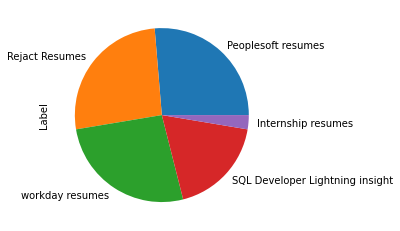

In [59]:
final_nlp_project.Label.value_counts().plot(kind = 'pie')

<AxesSubplot:>

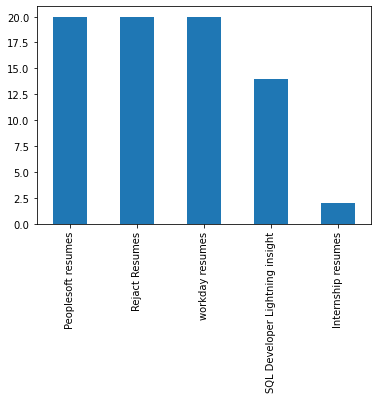

In [60]:
final_nlp_project.Label.value_counts().plot(kind = 'bar')

+ First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the resume length

+ caculating each characterstic in dataframe

In [61]:
final_nlp_project['Extracted'].map(len)
  
# For single values
characters = final_nlp_project['Extracted'].apply(len)

In [62]:
characters

0     8010
1     8318
2     6900
3     4918
4     5196
      ... 
71    8329
72    6836
73    5126
74    6175
75    1901
Name: Extracted, Length: 76, dtype: int64

+ mean of each characterstics in data set

In [63]:
print('Mean of each characters in datset:',characters.mean())
print('Median of characters in dataset:',characters.median())
print('Standard Deviation of characters in dataset:',characters.std())
print('skew of characters dataset:',characters.skew())
print('sum of characters dataset:',characters.sum())

Mean of each characters in datset: 5479.328947368421
Median of characters in dataset: 4665.0
Standard Deviation of characters in dataset: 3148.7375772443906
skew of characters dataset: 1.888408299139015
sum of characters dataset: 416429


+ describe about characters in dataset

In [64]:
characters.describe()

count       76.000000
mean      5479.328947
std       3148.737577
min       1773.000000
25%       3292.500000
50%       4665.000000
75%       6803.000000
max      18489.000000
Name: Extracted, dtype: float64

+ lets make a histogram  for better understandying

<AxesSubplot:ylabel='Density'>

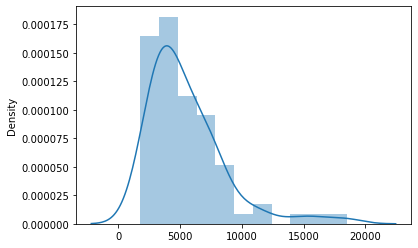

In [65]:
sns.distplot(x = characters)

In [66]:
 words = final_nlp_project['Extracted'].apply(lambda x: len(str(x).split(' ')))

In [67]:
words

0     1896
1     2505
2     2133
3     1276
4     1241
      ... 
71    1756
72    1564
73    1060
74    3419
75     768
Name: Extracted, Length: 76, dtype: int64

+ average word of each length in each sentense


<AxesSubplot:ylabel='Density'>

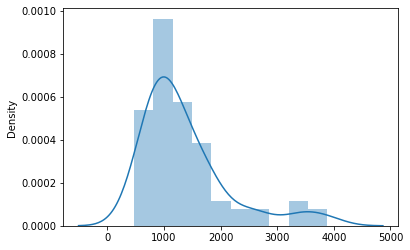

In [68]:
sns.distplot(x = words)

+  performing discriptive stats of each words

In [69]:
print('Mean of each words in datset:',words.mean())
print('Median of words in dataset:',words.median())
print('Standard Deviation of words in dataset:',words.std())
print('skew of words dataset:',words.skew())
print('sum of words dataset:', words.sum())

Mean of each words in datset: 1364.8947368421052
Median of words in dataset: 1093.0
Standard Deviation of words in dataset: 777.0026439928824
skew of words dataset: 1.7127220256450655
sum of words dataset: 103732


+ describe about words in dataset

In [70]:
words.describe()

count      76.000000
mean     1364.894737
std       777.002644
min       471.000000
25%       856.000000
50%      1093.000000
75%      1587.250000
max      3886.000000
Name: Extracted, dtype: float64

# Data Preprocessing 

+ removing special characters , normalizing the data 

In [71]:
final_nlp_project['Extracted']=final_nlp_project['Extracted'].str.replace('[#,@,&]','',regex=True)

In [72]:
final_nlp_project

Extracted               Label
0   Anubhav Kumar Singh      Core Competencies    ...  Peoplesoft resumes
1   G  Ananda Rayudu            https   www linked...  Peoplesoft resumes
2   PeopleSoft Database Administrator             ...  Peoplesoft resumes
3   Classification  Internal  Classification  Inte...  Peoplesoft resumes
4   Priyanka Ramadoss          MountPleasant     C...  Peoplesoft resumes
..                                                ...                 ...
71  WORKDAY   HCM   FCM  Name     Kumar S S  Role ...     workday resumes
72  Venkateswarlu B        Workday Consultant     ...     workday resumes
73  Vinay kumar  v Workday Functional Consultant  ...     workday resumes
74  Name  Ravali P                                ...  Internship resumes
75  SUSOVAN  BAG     Seeking  a  challenging  posi...  Internship resumes

[76 rows x 2 columns]

In [73]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.lower()

In [74]:
pd.pandas.set_option('display.max_rows',None)
final_nlp_project

Extracted  \
0   anubhav kumar singh      core competencies    ...   
1   g  ananda rayudu            https   www linked...   
2   peoplesoft database administrator             ...   
3   classification  internal  classification  inte...   
4   priyanka ramadoss          mountpleasant     c...   
5   sirazuddin m   bangalore  india       sirazudd...   
6   peoplesoft administrator      srinivas k      ...   
7   peoplesoft admin  varkala vikas    career obje...   
8   vinod akkala                                  ...   
9   peoplesoft admin peoplesoft dba    ganesh alla...   
10  peoplesoft administration     vivekanand sayan...   
11  arun venu       experience summary       exper...   
12  personal details      name  pritam biswas  dat...   
13  rahul ahuja                                   ...   
14  hari narayana                                 ...   
15  murali                             professiona...   
16  priyabrata hota      career objective      pur...   
17  r ahmed                                       ...   
18  tanna sujatha         objective  seeking a cha...   
19  c o n t a c t      address  manyata tech park ...   
20  name  ravali p                                ...   
21  kanumuru deepak reddy         career objective...   
22  haripriya battina   experience as ui developer...   
23  kamalakar reddy  a   linked in  https   www li...   
24  naveen sadhu      title  software developer   ...   
25  pragnya pattnaik            expertise       ha...   
26  sarala madasu  sarala madasu        sri geethi...   
27  thirupathamma balla    summary         year of...   
28  ui developer  react js developer   name  krish...   
29  ui developer  react js developer   name  krish...   
30  kotani durga prasad      objective     aspiran...   
31  venkatalakshmi pedireddy  software developer  ...   
32  kambala sai surendra                    summar...   
33  mareedu lokesh babu  professional overview    ...   
34  mareedu lokesh babu    professional overview  ...   
35  md khizaruddin rauf      experience           ...   
36        name  m  prabakaran  title  ui developer...   
37  pranish sonone              career summary    ...   
38  ranga gaganam         professional     summary...   
39  shaik abdul sharuk       years  experience in ...   
40  anil kumar maddukuri      sql   msbi developer...   
41  aradhana tripathi    current location  gachibo...   
42  buddha vamsi                                  ...   
43  kamballa pradeep                              ...   
44    hyderabad   nazeer basha  sql and power bi d...   
45  resume  name        neeraj mishra    experienc...   
46  sql developer  name      bandi prem sai    car...   
47  sql server developer      priyanka l          ...   
48  sql server developer      p  syam kumar       ...   
49  raju pavana kumari        professional summary...   
50  resume                  ramalakshmi k         ...   
51  name  ramesh      career objective            ...   
52  tatikonda kiran kumar           career objecti...   
53  sql and msbi developer  sql and msbi developer...   
54  chinna subbarayudu m  dob    th march       na...   
55  name           gopi krishna reddy             ...   
56  hari krishna m      summary   a result oriente...   
57  harikrishna akula                             ...   
58  hima mendu         career objective  to contin...   
59  g himaja                                      ...   
60  jyoti verma         professional summary  prof...   
61  madeeswar a            profile summary     hav...   
62  mooraboyina guravaiah  workday integration spe...   
63  name   naresh babu cherukuri    objective   to...   
64  venkata saikrishna   workday consultant      p...   
65  punugoti swetha  workday technical consultant ...   
66  workday hcm  techno functional consultant     ...   
67  ramesh a                      workday hcm cons...   
68  shireesh balasani                             ...   
69  workday integration consultant    name        ... 

+ removing numbers in dataset

In [75]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.replace('\d+', '')

In [76]:
final_nlp_project

Extracted  \
0   anubhav kumar singh      core competencies    ...   
1   g  ananda rayudu            https   www linked...   
2   peoplesoft database administrator             ...   
3   classification  internal  classification  inte...   
4   priyanka ramadoss          mountpleasant     c...   
5   sirazuddin m   bangalore  india       sirazudd...   
6   peoplesoft administrator      srinivas k      ...   
7   peoplesoft admin  varkala vikas    career obje...   
8   vinod akkala                                  ...   
9   peoplesoft admin peoplesoft dba    ganesh alla...   
10  peoplesoft administration     vivekanand sayan...   
11  arun venu       experience summary       exper...   
12  personal details      name  pritam biswas  dat...   
13  rahul ahuja                                   ...   
14  hari narayana                                 ...   
15  murali                             professiona...   
16  priyabrata hota      career objective      pur...   
17  r ahmed                                       ...   
18  tanna sujatha         objective  seeking a cha...   
19  c o n t a c t      address  manyata tech park ...   
20  name  ravali p                                ...   
21  kanumuru deepak reddy         career objective...   
22  haripriya battina   experience as ui developer...   
23  kamalakar reddy  a   linked in  https   www li...   
24  naveen sadhu      title  software developer   ...   
25  pragnya pattnaik            expertise       ha...   
26  sarala madasu  sarala madasu        sri geethi...   
27  thirupathamma balla    summary         year of...   
28  ui developer  react js developer   name  krish...   
29  ui developer  react js developer   name  krish...   
30  kotani durga prasad      objective     aspiran...   
31  venkatalakshmi pedireddy  software developer  ...   
32  kambala sai surendra                    summar...   
33  mareedu lokesh babu  professional overview    ...   
34  mareedu lokesh babu    professional overview  ...   
35  md khizaruddin rauf      experience           ...   
36        name  m  prabakaran  title  ui developer...   
37  pranish sonone              career summary    ...   
38  ranga gaganam         professional     summary...   
39  shaik abdul sharuk       years  experience in ...   
40  anil kumar maddukuri      sql   msbi developer...   
41  aradhana tripathi    current location  gachibo...   
42  buddha vamsi                                  ...   
43  kamballa pradeep                              ...   
44    hyderabad   nazeer basha  sql and power bi d...   
45  resume  name        neeraj mishra    experienc...   
46  sql developer  name      bandi prem sai    car...   
47  sql server developer      priyanka l          ...   
48  sql server developer      p  syam kumar       ...   
49  raju pavana kumari        professional summary...   
50  resume                  ramalakshmi k         ...   
51  name  ramesh      career objective            ...   
52  tatikonda kiran kumar           career objecti...   
53  sql and msbi developer  sql and msbi developer...   
54  chinna subbarayudu m  dob    th march       na...   
55  name           gopi krishna reddy             ...   
56  hari krishna m      summary   a result oriente...   
57  harikrishna akula                             ...   
58  hima mendu         career objective  to contin...   
59  g himaja                                      ...   
60  jyoti verma         professional summary  prof...   
61  madeeswar a            profile summary     hav...   
62  mooraboyina guravaiah  workday integration spe...   
63  name   naresh babu cherukuri    objective   to...   
64  venkata saikrishna   workday consultant      p...   
65  punugoti swetha  workday technical consultant ...   
66  workday hcm  techno functional consultant     ...   
67  ramesh a                      workday hcm cons...   
68  shireesh balasani                             ...   
69  workday integration consultant    name        ... 

+ checking integers are removed r not 

In [77]:
res = True if next((chr for chr in final_nlp_project if chr.isdigit()), None) else False

In [78]:
print(res)

False


+ Removing urls 

In [79]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.replace('http\S+|www.\S+', '', case=False)

In [80]:
final_nlp_project

Extracted  \
0   anubhav kumar singh      core competencies    ...   
1   g  ananda rayudu                com in anandgu...   
2   peoplesoft database administrator             ...   
3   classification  internal  classification  inte...   
4   priyanka ramadoss          mountpleasant     c...   
5   sirazuddin m   bangalore  india       sirazudd...   
6   peoplesoft administrator      srinivas k      ...   
7   peoplesoft admin  varkala vikas    career obje...   
8   vinod akkala                                  ...   
9   peoplesoft admin peoplesoft dba    ganesh alla...   
10  peoplesoft administration     vivekanand sayan...   
11  arun venu       experience summary       exper...   
12  personal details      name  pritam biswas  dat...   
13  rahul ahuja                                   ...   
14  hari narayana                                 ...   
15  murali                             professiona...   
16  priyabrata hota      career objective      pur...   
17  r ahmed                                       ...   
18  tanna sujatha         objective  seeking a cha...   
19  c o n t a c t      address  manyata tech park ...   
20  name  ravali p                                ...   
21  kanumuru deepak reddy         career objective...   
22  haripriya battina   experience as ui developer...   
23  kamalakar reddy  a   linked in      com in kam...   
24  naveen sadhu      title  software developer   ...   
25  pragnya pattnaik            expertise       ha...   
26  sarala madasu  sarala madasu        sri geethi...   
27  thirupathamma balla    summary         year of...   
28  ui developer  react js developer   name  krish...   
29  ui developer  react js developer   name  krish...   
30  kotani durga prasad      objective     aspiran...   
31  venkatalakshmi pedireddy  software developer  ...   
32  kambala sai surendra                    summar...   
33  mareedu lokesh babu  professional overview    ...   
34  mareedu lokesh babu    professional overview  ...   
35  md khizaruddin rauf      experience           ...   
36        name  m  prabakaran  title  ui developer...   
37  pranish sonone              career summary    ...   
38  ranga gaganam         professional     summary...   
39  shaik abdul sharuk       years  experience in ...   
40  anil kumar maddukuri      sql   msbi developer...   
41  aradhana tripathi    current location  gachibo...   
42  buddha vamsi                                  ...   
43  kamballa pradeep                              ...   
44    hyderabad   nazeer basha  sql and power bi d...   
45  resume  name        neeraj mishra    experienc...   
46  sql developer  name      bandi prem sai    car...   
47  sql server developer      priyanka l          ...   
48  sql server developer      p  syam kumar       ...   
49  raju pavana kumari        professional summary...   
50  resume                  ramalakshmi k         ...   
51  name  ramesh      career objective            ...   
52  tatikonda kiran kumar           career objecti...   
53  sql and msbi developer  sql and msbi developer...   
54  chinna subbarayudu m  dob    th march       na...   
55  name           gopi krishna reddy             ...   
56  hari krishna m      summary   a result oriente...   
57  harikrishna akula                             ...   
58  hima mendu         career objective  to contin...   
59  g himaja                                      ...   
60  jyoti verma         professional summary  prof...   
61  madeeswar a            profile summary     hav...   
62  mooraboyina guravaiah  workday integration spe...   
63  name   naresh babu cherukuri    objective   to...   
64  venkata saikrishna   workday consultant      p...   
65  punugoti swetha  workday technical consultant ...   
66  workday hcm  techno functional consultant     ...   
67  ramesh a                      workday hcm cons...   
68  shireesh balasani                             ...   
69  workday integration consultant    name        ... 

+  removing punctuation

In [81]:
 final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.replace('[{}]'.format(string.punctuation), '')


+ removing special characters

In [82]:
final_nlp_project['Extracted']=final_nlp_project['Extracted'].str.replace('[#,@,&]','')

In [83]:
final_nlp_project

Extracted  \
0   anubhav kumar singh      core competencies    ...   
1   g  ananda rayudu                com in anandgu...   
2   peoplesoft database administrator             ...   
3   classification  internal  classification  inte...   
4   priyanka ramadoss          mountpleasant     c...   
5   sirazuddin m   bangalore  india       sirazudd...   
6   peoplesoft administrator      srinivas k      ...   
7   peoplesoft admin  varkala vikas    career obje...   
8   vinod akkala                                  ...   
9   peoplesoft admin peoplesoft dba    ganesh alla...   
10  peoplesoft administration     vivekanand sayan...   
11  arun venu       experience summary       exper...   
12  personal details      name  pritam biswas  dat...   
13  rahul ahuja                                   ...   
14  hari narayana                                 ...   
15  murali                             professiona...   
16  priyabrata hota      career objective      pur...   
17  r ahmed                                       ...   
18  tanna sujatha         objective  seeking a cha...   
19  c o n t a c t      address  manyata tech park ...   
20  name  ravali p                                ...   
21  kanumuru deepak reddy         career objective...   
22  haripriya battina   experience as ui developer...   
23  kamalakar reddy  a   linked in      com in kam...   
24  naveen sadhu      title  software developer   ...   
25  pragnya pattnaik            expertise       ha...   
26  sarala madasu  sarala madasu        sri geethi...   
27  thirupathamma balla    summary         year of...   
28  ui developer  react js developer   name  krish...   
29  ui developer  react js developer   name  krish...   
30  kotani durga prasad      objective     aspiran...   
31  venkatalakshmi pedireddy  software developer  ...   
32  kambala sai surendra                    summar...   
33  mareedu lokesh babu  professional overview    ...   
34  mareedu lokesh babu    professional overview  ...   
35  md khizaruddin rauf      experience           ...   
36        name  m  prabakaran  title  ui developer...   
37  pranish sonone              career summary    ...   
38  ranga gaganam         professional     summary...   
39  shaik abdul sharuk       years  experience in ...   
40  anil kumar maddukuri      sql   msbi developer...   
41  aradhana tripathi    current location  gachibo...   
42  buddha vamsi                                  ...   
43  kamballa pradeep                              ...   
44    hyderabad   nazeer basha  sql and power bi d...   
45  resume  name        neeraj mishra    experienc...   
46  sql developer  name      bandi prem sai    car...   
47  sql server developer      priyanka l          ...   
48  sql server developer      p  syam kumar       ...   
49  raju pavana kumari        professional summary...   
50  resume                  ramalakshmi k         ...   
51  name  ramesh      career objective            ...   
52  tatikonda kiran kumar           career objecti...   
53  sql and msbi developer  sql and msbi developer...   
54  chinna subbarayudu m  dob    th march       na...   
55  name           gopi krishna reddy             ...   
56  hari krishna m      summary   a result oriente...   
57  harikrishna akula                             ...   
58  hima mendu         career objective  to contin...   
59  g himaja                                      ...   
60  jyoti verma         professional summary  prof...   
61  madeeswar a            profile summary     hav...   
62  mooraboyina guravaiah  workday integration spe...   
63  name   naresh babu cherukuri    objective   to...   
64  venkata saikrishna   workday consultant      p...   
65  punugoti swetha  workday technical consultant ...   
66  workday hcm  techno functional consultant     ...   
67  ramesh a                      workday hcm cons...   
68  shireesh balasani                             ...   
69  workday integration consultant    name        ... 

+ removing white spaces 

In [84]:
final_nlp_project['Extracted'].str.strip()


0     anubhav kumar singh      core competencies    ...
1     g  ananda rayudu                com in anandgu...
2     peoplesoft database administrator             ...
3     classification  internal  classification  inte...
4     priyanka ramadoss          mountpleasant     c...
5     sirazuddin m   bangalore  india       sirazudd...
6     peoplesoft administrator      srinivas k      ...
7     peoplesoft admin  varkala vikas    career obje...
8     vinod akkala                                  ...
9     peoplesoft admin peoplesoft dba    ganesh alla...
10    peoplesoft administration     vivekanand sayan...
11    arun venu       experience summary       exper...
12    personal details      name  pritam biswas  dat...
13    rahul ahuja                                   ...
14    hari narayana                                 ...
15    murali                             professiona...
16    priyabrata hota      career objective      pur...
17    r ahmed                                   

+ applying Contractions

+ removing stopwords

In [85]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [86]:
print(len(sw_nltk))


179


In [87]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].apply(lambda x: " ".join(x for x in x.split() if x not in sw_nltk))

In [88]:
final_nlp_project

Extracted  \
0   anubhav kumar singh core competencies scriptin...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience years ...   
12  personal details name pritam biswas date birth...   
13  rahul ahuja summary years experience peoplesof...   
14  hari narayana professional summary years exper...   
15  murali professional summary years experience p...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around years experi...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react js developer name krishna p...   
29  ui developer react js developer name krishna p...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience years...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk years experience wipro care...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective years experience...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary years ...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary years experience aro...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around years experie...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

+ Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.

In [89]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.split()


In [90]:
final_nlp_project

Extracted  \
0   [anubhav, kumar, singh, core, competencies, sc...   
1   [g, ananda, rayudu, com, anandgudapati, profil...   
2   [peoplesoft, database, administrator, gangared...   
3   [classification, internal, classification, int...   
4   [priyanka, ramadoss, mountpleasant, coonoor, n...   
5   [sirazuddin, bangalore, india, sirazuddin, ban...   
6   [peoplesoft, administrator, srinivas, k, exper...   
7   [peoplesoft, admin, varkala, vikas, career, ob...   
8   [vinod, akkala, peoplesoft, dba, admin, profes...   
9   [peoplesoft, admin, peoplesoft, dba, ganesh, a...   
10  [peoplesoft, administration, vivekanand, sayan...   
11  [arun, venu, experience, summary, experience, ...   
12  [personal, details, name, pritam, biswas, date...   
13  [rahul, ahuja, summary, years, experience, peo...   
14  [hari, narayana, professional, summary, years,...   
15  [murali, professional, summary, years, experie...   
16  [priyabrata, hota, career, objective, pursuing...   
17  [r, ahmed, peoplesoft, technical, consultant, ...   
18  [tanna, sujatha, objective, seeking, challengi...   
19  [c, n, c, address, manyata, tech, park, nagava...   
20  [name, ravali, p, curriculum, vitae, specializ...   
21  [kanumuru, deepak, reddy, career, objective, s...   
22  [haripriya, battina, experience, ui, developer...   
23  [kamalakar, reddy, linked, com, kamalakar, red...   
24  [naveen, sadhu, title, software, developer, lo...   
25  [pragnya, pattnaik, expertise, around, years, ...   
26  [sarala, madasu, sarala, madasu, sri, geethika...   
27  [thirupathamma, balla, summary, year, experien...   
28  [ui, developer, react, js, developer, name, kr...   
29  [ui, developer, react, js, developer, name, kr...   
30  [kotani, durga, prasad, objective, aspirant, p...   
31  [venkatalakshmi, pedireddy, software, develope...   
32  [kambala, sai, surendra, summary, project, bas...   
33  [mareedu, lokesh, babu, professional, overview...   
34  [mareedu, lokesh, babu, professional, overview...   
35  [md, khizaruddin, rauf, experience, currently,...   
36  [name, prabakaran, title, ui, developer, profe...   
37  [pranish, sonone, career, summary, experience,...   
38  [ranga, gaganam, professional, summary, profes...   
39  [shaik, abdul, sharuk, years, experience, wipr...   
40  [anil, kumar, maddukuri, sql, msbi, developer,...   
41  [aradhana, tripathi, current, location, gachib...   
42  [buddha, vamsi, career, objective, years, expe...   
43  [kamballa, pradeep, synopsis, looking, forward...   
44  [hyderabad, nazeer, basha, sql, power, bi, dev...   
45  [resume, name, neeraj, mishra, experience, sum...   
46  [sql, developer, name, bandi, prem, sai, caree...   
47  [sql, server, developer, priyanka, l, professi...   
48  [sql, server, developer, p, syam, kumar, profe...   
49  [raju, pavana, kumari, professional, summary, ...   
50  [resume, ramalakshmi, k, career, objective, pr...   
51  [name, ramesh, career, objective, contribute, ...   
52  [tatikonda, kiran, kumar, career, objective, r...   
53  [sql, msbi, developer, sql, msbi, developer, b...   
54  [chinna, subbarayudu, dob, th, march, national...   
55  [name, gopi, krishna, reddy, professional, sum...   
56  [hari, krishna, summary, result, oriented, pro...   
57  [harikrishna, akula, summary, years, experienc...   
58  [hima, mendu, career, objective, continue, gro...   
59  [g, himaja, career, objective, work, towards, ...   
60  [jyoti, verma, professional, summary, professi...   
61  [madeeswar, profile, summary, around, years, e...   
62  [mooraboyina, guravaiah, workday, integration,...   
63  [name, naresh, babu, cherukuri, objective, tak...   
64  [venkata, saikrishna, workday, consultant, pro...   
65  [punugoti, swetha, workday, technical, consult...   
66  [workday, hcm, techno, functional, consultant,...   
67  [ramesh, workday, hcm, consultant, professiona...   
68  [shireesh, balasani, hcm, consultant, profile,...   
69  [workday, integration, consultant, name, sri, ... 

+ Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [91]:
lemmatiazer = WordNetLemmatizer()
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].apply(lambda x: [lemmatiazer.lemmatize(y) for y in x]) 



In [92]:
final_nlp_project

Extracted  \
0   [anubhav, kumar, singh, core, competency, scri...   
1   [g, ananda, rayudu, com, anandgudapati, profil...   
2   [peoplesoft, database, administrator, gangared...   
3   [classification, internal, classification, int...   
4   [priyanka, ramadoss, mountpleasant, coonoor, n...   
5   [sirazuddin, bangalore, india, sirazuddin, ban...   
6   [peoplesoft, administrator, srinivas, k, exper...   
7   [peoplesoft, admin, varkala, vikas, career, ob...   
8   [vinod, akkala, peoplesoft, dba, admin, profes...   
9   [peoplesoft, admin, peoplesoft, dba, ganesh, a...   
10  [peoplesoft, administration, vivekanand, sayan...   
11  [arun, venu, experience, summary, experience, ...   
12  [personal, detail, name, pritam, biswas, date,...   
13  [rahul, ahuja, summary, year, experience, peop...   
14  [hari, narayana, professional, summary, year, ...   
15  [murali, professional, summary, year, experien...   
16  [priyabrata, hota, career, objective, pursuing...   
17  [r, ahmed, peoplesoft, technical, consultant, ...   
18  [tanna, sujatha, objective, seeking, challengi...   
19  [c, n, c, address, manyata, tech, park, nagava...   
20  [name, ravali, p, curriculum, vitae, specializ...   
21  [kanumuru, deepak, reddy, career, objective, s...   
22  [haripriya, battina, experience, ui, developer...   
23  [kamalakar, reddy, linked, com, kamalakar, red...   
24  [naveen, sadhu, title, software, developer, lo...   
25  [pragnya, pattnaik, expertise, around, year, e...   
26  [sarala, madasu, sarala, madasu, sri, geethika...   
27  [thirupathamma, balla, summary, year, experien...   
28  [ui, developer, react, j, developer, name, kri...   
29  [ui, developer, react, j, developer, name, kri...   
30  [kotani, durga, prasad, objective, aspirant, p...   
31  [venkatalakshmi, pedireddy, software, develope...   
32  [kambala, sai, surendra, summary, project, bas...   
33  [mareedu, lokesh, babu, professional, overview...   
34  [mareedu, lokesh, babu, professional, overview...   
35  [md, khizaruddin, rauf, experience, currently,...   
36  [name, prabakaran, title, ui, developer, profe...   
37  [pranish, sonone, career, summary, experience,...   
38  [ranga, gaganam, professional, summary, profes...   
39  [shaik, abdul, sharuk, year, experience, wipro...   
40  [anil, kumar, maddukuri, sql, msbi, developer,...   
41  [aradhana, tripathi, current, location, gachib...   
42  [buddha, vamsi, career, objective, year, exper...   
43  [kamballa, pradeep, synopsis, looking, forward...   
44  [hyderabad, nazeer, basha, sql, power, bi, dev...   
45  [resume, name, neeraj, mishra, experience, sum...   
46  [sql, developer, name, bandi, prem, sai, caree...   
47  [sql, server, developer, priyanka, l, professi...   
48  [sql, server, developer, p, syam, kumar, profe...   
49  [raju, pavana, kumari, professional, summary, ...   
50  [resume, ramalakshmi, k, career, objective, pr...   
51  [name, ramesh, career, objective, contribute, ...   
52  [tatikonda, kiran, kumar, career, objective, r...   
53  [sql, msbi, developer, sql, msbi, developer, b...   
54  [chinna, subbarayudu, dob, th, march, national...   
55  [name, gopi, krishna, reddy, professional, sum...   
56  [hari, krishna, summary, result, oriented, pro...   
57  [harikrishna, akula, summary, year, experience...   
58  [hima, mendu, career, objective, continue, gro...   
59  [g, himaja, career, objective, work, towards, ...   
60  [jyoti, verma, professional, summary, professi...   
61  [madeeswar, profile, summary, around, year, ex...   
62  [mooraboyina, guravaiah, workday, integration,...   
63  [name, naresh, babu, cherukuri, objective, tak...   
64  [venkata, saikrishna, workday, consultant, pro...   
65  [punugoti, swetha, workday, technical, consult...   
66  [workday, hcm, techno, functional, consultant,...   
67  [ramesh, workday, hcm, consultant, professiona...   
68  [shireesh, balasani, hcm, consultant, profile,...   
69  [workday, integration, consultant, name, sri, ... 

+ Detokenize it is used to untokenzier the data 

In [93]:
Detokenize = TreebankWordDetokenizer()


In [94]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].apply(lambda x: Detokenize.detokenize(x))

In [95]:
final_nlp_project

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

In [96]:
freq_Sw = pd.Series(' '.join(final_nlp_project['Extracted']).split()).value_counts() 
freq_Sw

experience                577
server                    511
application               510
report                    464
peoplesoft                453
workday                   410
using                     379
project                   360
integration               357
data                      324
database                  295
process                   292
sql                       281
system                    276
business                  269
tool                      238
knowledge                 231
web                       227
client                    215
worked                    210
role                      206
service                   200
environment               200
requirement               198
skill                     184
involved                  180
good                      180
hcm                       180
support                   177
like                      173
team                      172
technology                165
development               160
e         

<AxesSubplot:>

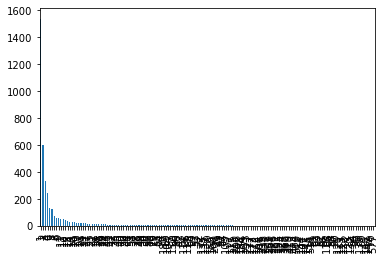

In [97]:
freq_Sw.value_counts().plot(kind = 'bar')

In [98]:
len_resume = final_nlp_project['Extracted'].astype(str).apply(len)


In [99]:
len_resume

0      6234
1      5837
2      4777
3      3699
4      4024
5      2846
6     14236
7      6260
8     11146
9      8477
10    11978
11     6051
12     4465
13     8029
14     2886
15     2853
16     2621
17     2071
18     2109
19     1581
20     2921
21     2978
22     1933
23     2078
24     1279
25     2296
26     2462
27     1503
28     2960
29     2960
30     4148
31     1686
32     1851
33     1780
34     1780
35     2180
36     2156
37     1294
38     2195
39     2055
40     3517
41     4101
42     2365
43     3680
44     6007
45     3367
46     3282
47     2567
48     2685
49     3016
50     3181
51     5100
52     2852
53     3163
54     4969
55     3706
56     6532
57     5742
58     2941
59     3942
60     3732
61     4614
62     5078
63     5492
64     3451
65     3669
66     7168
67     4652
68     8734
69     5717
70     5144
71     6579
72     5217
73     4028
74     2921
75     1180
Name: Extracted, dtype: int64

<AxesSubplot:ylabel='Density'>

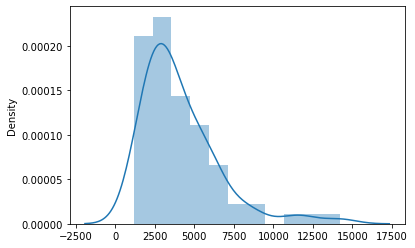

In [100]:
sns.distplot(x = len_resume)

# polarity
+ Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [101]:
polarity_resume = final_nlp_project['Extracted'].map(lambda text: TextBlob(text).sentiment.polarity)


In [102]:
polarity_resume

0     0.095742
1     0.254542
2     0.245635
3     0.017619
4     0.144086
5     0.059091
6     0.125223
7     0.117625
8     0.155469
9     0.101253
10    0.106288
11    0.076341
12    0.104944
13    0.100849
14    0.174775
15    0.185173
16    0.120693
17    0.233996
18    0.195386
19    0.214015
20    0.434170
21    0.204209
22    0.190710
23    0.136434
24    0.209119
25    0.281713
26    0.287405
27    0.038450
28    0.086259
29    0.086259
30    0.201793
31    0.044751
32    0.202549
33    0.092411
34    0.092411
35    0.166531
36    0.076231
37    0.222126
38    0.250758
39    0.197487
40    0.026437
41    0.044220
42    0.099067
43    0.178497
44    0.176606
45    0.135931
46    0.252965
47    0.168888
48    0.122067
49    0.110018
50    0.052735
51    0.052428
52    0.143339
53    0.128220
54    0.154545
55    0.212950
56    0.189576
57    0.127347
58    0.066667
59    0.224549
60    0.175000
61    0.180562
62    0.136302
63    0.139613
64    0.130000
65    0.169066
66    0.11

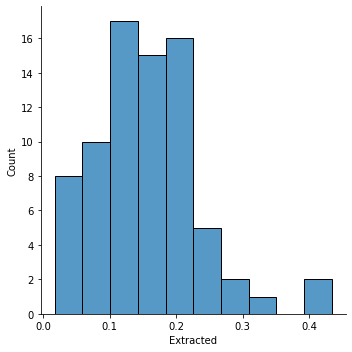

In [103]:
sns.displot(x=polarity_resume)

In [104]:
polarity_resume.skew()

1.039588688444192

#  Sentiment Analysis
+ Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral.

In [105]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [106]:
afinn.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [107]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [108]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [109]:
calculate_sentiment(text = 'amazing')

4

In [110]:
final_nlp_project['sentiment_value'] = final_nlp_project['Extracted'].apply(calculate_sentiment)

In [111]:
final_nlp_project

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

In [112]:
final_nlp_project['word_count'] = final_nlp_project['Extracted'].str.split().apply(len)
final_nlp_project

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

In [113]:
final_nlp_project['sentiment_value'].describe()

count    76.000000
mean     36.065789
std      21.026545
min      -2.000000
25%      19.750000
50%      29.500000
75%      51.000000
max      96.000000
Name: sentiment_value, dtype: float64

In [114]:
final_nlp_project['word_count'].describe()

count      76.000000
mean      528.894737
std       302.988738
min       159.000000
25%       328.500000
50%       459.000000
75%       667.250000
max      1765.000000
Name: word_count, dtype: float64

In [115]:
final_nlp_project[final_nlp_project['sentiment_value']<=0].head()

Extracted               Label  \
16  priyabrata hota career objective pursuing peop...  Peoplesoft resumes   

    sentiment_value  word_count  
16               -2         353

In [116]:
final_nlp_project[final_nlp_project['sentiment_value']>=20].head()

Extracted               Label  \
0  anubhav kumar singh core competency scripting ...  Peoplesoft resumes   
1  g ananda rayudu com anandgudapati profile summ...  Peoplesoft resumes   
2  peoplesoft database administrator gangareddy p...  Peoplesoft resumes   
3  classification internal classification interna...  Peoplesoft resumes   
4  priyanka ramadoss mountpleasant coonoor nilgir...  Peoplesoft resumes   

   sentiment_value  word_count  
0               29         774  
1               54         727  
2               27         597  
3               24         471  
4               27         493

In [117]:
final_nlp_project['index']=range(0,len(final_nlp_project))

In [118]:
final_nlp_project

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

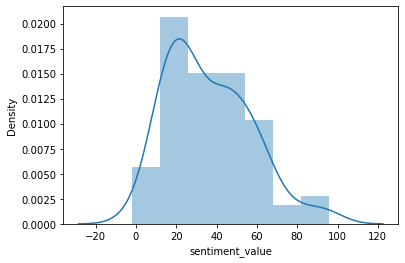

In [119]:
sns.distplot(final_nlp_project['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

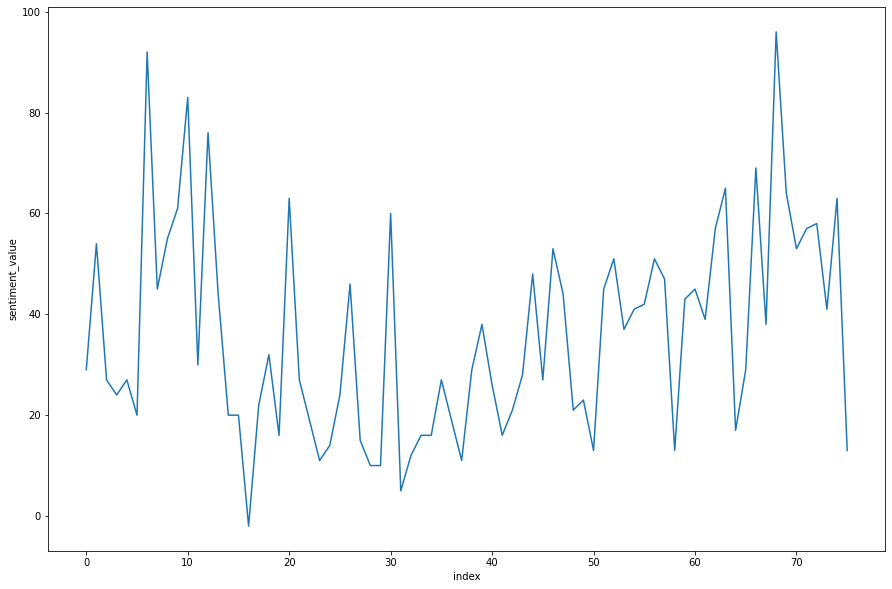

In [120]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=final_nlp_project)

+ dropping columns in sentiment , word , index from dataframe

In [121]:
final_nlp_project = final_nlp_project.drop(labels='sentiment_value', axis = 1,    inplace = False)

In [122]:
final_nlp_project

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

In [123]:
final_nlp_project = final_nlp_project.drop(labels='word_count', axis = 1,    inplace = False)

In [124]:
final_nlp_project

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

In [125]:
final_nlp_project = final_nlp_project.drop(labels='index', axis = 1,    inplace = False)

In [126]:
final_nlp_project

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

# CountVectorizer
+ In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called tokenization. These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization).

+ Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [127]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(final_nlp_project["Extracted"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [128]:
word_freq_df

term  occurrences  frequency
0                      abdul            3   0.000079
1                    ability           45   0.001189
2                       able            1   0.000026
3                    abreast            1   0.000026
4                    absence           32   0.000846
5                     absent            1   0.000026
6                   abstract            2   0.000053
7                abstraction            2   0.000053
8                         ac            1   0.000026
9                   academic           14   0.000370
10                 accenture            8   0.000211
11                    accept            1   0.000026
12                acceptable            4   0.000106
13                acceptance            7   0.000185
14                    access           25   0.000661
15             accessibility            3   0.000079
16                accessible            1   0.000026
17                 accessing            2   0.000053
18                 accessory            2   0.000053
19               acclimatize            1   0.000026
20               accommodate            2   0.000053
21                accomplish            2   0.000053
22              accomplished            1   0.000026
23                 according           17   0.000449
24                   account           31   0.000819
25                accountant            1   0.000026
26                accounting            4   0.000106
27                  accuracy            2   0.000053
28                   achieve            9   0.000238
29                  achieved            1   0.000026
30               achievement           13   0.000344
31                 achieving            4   0.000106
32              acknowledged            1   0.000026
33           acknowledgement            1   0.000026
34                acquainted            1   0.000026
35               acquisition            2   0.000053
36                    across           29   0.000766
37                       act            3   0.000079
38                    action            3   0.000079
39                actionable            3   0.000079
40                 activated            1   0.000026
41                activating            2   0.000053
42                    active           12   0.000317
43                  actively            2   0.000053
44                  activity           77   0.002035
45                        ad            1   0.000026
46                     adapt            2   0.000053
47              adaptability            1   0.000026
48                  adaptive            1   0.000026
49                       add           10   0.000264
50                     added            5   0.000132
51                    adding           19   0.000502
52                additional            6   0.000159
53              additionally            3   0.000079
54                      addm            5   0.000132
55                   address           13   0.000344
56                addressing            1   0.000026
57                     adept            3   0.000079
58                    adhere            2   0.000053
59                  adhering            1   0.000026
60                     adhoc            4   0.000106
61                    aditya            3   0.000079
62                     admin           42   0.001110
63              adminissions            1   0.000026
64                administer            4   0.000106
65             administering            2   0.000053
66            administrating            3   0.000079
67            administration           48   0.001269
68            administrative            2   0.000053
69             administrator           27   0.000714
70                 admission            1   0.000026
71                       ado            1   0.000026
72                     adopt            3   0.000079
73                  adopting            1   0.000026
74                       adp           10   0.000

<AxesSubplot:>

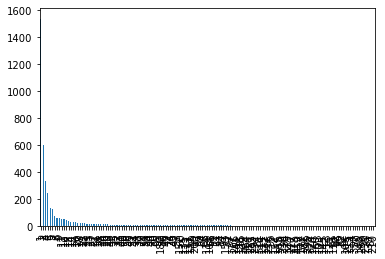

In [129]:
word_freq_df.occurrences.value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Density'>

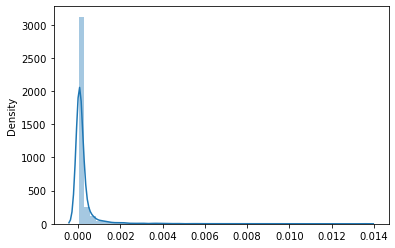

In [130]:
sns.distplot(x =[word_freq_df['frequency']])

# TFIDF - Term frequency inverse Document Frequencyt
+ TFIDF works by proportionally increasing the number of times a word appears in the document but is counterbalanced by the number of documents in which it is present.

In [131]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True,) #keep top 1000 words
doc_vec = vectorizer.fit_transform(final_nlp_project["Extracted"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [132]:
denselist

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.08204061378814209,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.12306092068221314,
  0.08003178540930814,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.18094569899298113,
  0.0,
  0.0,
  0.07814478120446537,
  0.0,
  0.0,
  0.15572582928062506,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.053675674946656204,
  0.0,
  0.0,
  0.0,
  0.026440753258635936,
  0.0,
  0.06877088060674762,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.08717704517035817,
  0.0,
  0.0,
  0.0,
  0.0762050325032503,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.021623693975519668,
  0.0,
  0.0,
  0.0,
  0.017529895720159474,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.019536195301116343,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.041020306894071046,
  0.02540167750108343,
  0.020510153447035523,
  0.0,
 

In [133]:
pd.pandas.set_option('display.max_columns',None)

df

ability   absence  academic  accenture  acceptance    access  according  \
0   0.000000  0.000000  0.000000   0.000000    0.000000  0.082041   0.000000   
1   0.000000  0.000000  0.000000   0.000000    0.028794  0.000000   0.000000   
2   0.000000  0.000000  0.000000   0.000000    0.000000  0.024340   0.000000   
3   0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
4   0.030342  0.000000  0.000000   0.125750    0.000000  0.041876   0.000000   
5   0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
6   0.033904  0.000000  0.000000   0.000000    0.000000  0.018717   0.000000   
7   0.000000  0.000000  0.000000   0.000000    0.000000  0.019789   0.000000   
8   0.000000  0.000000  0.000000   0.000000    0.000000  0.010634   0.000000   
9   0.000000  0.000000  0.000000   0.000000    0.000000  0.014143   0.000000   
10  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
11  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.043625   
12  0.000000  0.000000  0.000000   0.191742    0.000000  0.000000   0.000000   
13  0.024185  0.000000  0.000000   0.000000    0.000000  0.000000   0.072409   
14  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
15  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
16  0.000000  0.000000  0.000000   0.000000    0.000000  0.041159   0.000000   
17  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.065786   
18  0.045338  0.000000  0.203604   0.000000    0.000000  0.000000   0.000000   
19  0.000000  0.000000  0.000000   0.000000    0.100841  0.000000   0.000000   
20  0.000000  0.000000  0.046102   0.000000    0.000000  0.000000   0.000000   
21  0.000000  0.000000  0.050396   0.000000    0.000000  0.000000   0.050396   
22  0.000000  0.000000  0.079087   0.000000    0.000000  0.000000   0.000000   
23  0.047906  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
24  0.163711  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
25  0.092749  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
26  0.032299  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
27  0.097858  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
28  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
29  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
30  0.076415  0.000000  0.000000   0.000000    0.000000  0.000000   0.038130   
31  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
32  0.000000  0.000000  0.065204   0.000000    0.000000  0.000000   0.000000   
33  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
34  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
35  0.082325  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
36  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
37  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
38  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
39  0.163909  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
40  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
41  0.000000  0.000000  0.066456   0.000000    0.000000  0.000000   0.000000   
42  0.000000  0.000000  0.056822   0.000000    0.000000  0.000000   0.000000   
43  0.027003  0.000000  0.000000   0.000000    0.000000  0.149066   0.040422   
44  0.000000  0.000000  0.000000   0.000000    0.000000  0.013711   0.000000   
45  0.023630  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
46  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
47  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
48  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   0.000000   
49  0

## N - gram 
+ An N-gram means a sequence of N words. So for example, “Medium blog” is a 2-gram (a bigram), “A Medium blog post” is a 4-gram, and “Write on Medium” is a 3-gram (trigram). Well, that wasn't very interesting or exciting. True, but we still have to look at the probability used with n-grams

# unigram
+ A 1-gram (or unigram) is a one-word sequence. For the above sentence, the unigrams would simply be: “I”, “love”, “reading”

In [134]:
def get_top_n1_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1),  #for bi-gram, put ngram_range=(2,2)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [135]:
top1_words = get_top_n1_words(final_nlp_project["Extracted"], n=200) #top 200
top1_df = pd.DataFrame(top1_words)
top1_df.columns=["uni-gram", "Freq"]

In [136]:
top1_df

uni-gram  Freq
0         experience   577
1             server   511
2        application   510
3             report   464
4         peoplesoft   453
5            workday   410
6              using   379
7            project   360
8        integration   357
9               data   324
10          database   295
11           process   292
12               sql   281
13            system   276
14          business   269
15              tool   238
16         knowledge   231
17               web   227
18            client   215
19            worked   210
20              role   206
21       environment   200
22           service   200
23       requirement   198
24             skill   184
25               hcm   180
26          involved   180
27              good   180
28           support   177
29              like   173
30              team   172
31        technology   165
32       development   160
33            people   159
34          creating   159
35         technical   154
36            change   153
37           working   152
38           testing   152
39              user   152
40            domain   145
41           various   144
42           created   142
43    responsibility   141
44             issue   140
45            design   139
46            oracle   137
47               eib   137
48         developer   135
49             react   135
50          security   133
51        management   133
52        production   132
53            studio   122
54              core   121
55            custom   120
56            window   118
57         scheduler   117
58              year   117
59             query   116
60             table   115
61              date   114
62              test   114
63             field   113
64              work   111
65         developed   111
66      professional   109
67              code   106
68              file   104
69         connector   104
70          document   103
71               new   101
72            update    97
73        consultant    97
74         component    96
75            object    95
76              used    94
77              fscm    92
78               job    90
79         migration    87
80     configuration    86
81         reporting    85
82       information    84
83             based    84
84          software    83
85      organization    83
86         interface    83
87              html    83
88            module    82
89       performance    81
90       responsible    80
91           summary    80
92        functional    80
93       maintenance    79
94               end    79
95               xml    79
96          function    79
97          activity    77
98               per    77
99               day    76
100       developing    76
101   implementation    76
102              etc    74
103          profile    74
104             till    74
105        different    73
106       configured    72
107         solution    72
108            setup    71
109               cs    71
110       calculated    70
111   transformation    69
112          inbound    69
113             xslt    69
114             load    68
115         customer    68
116            patch    67
117            level    67
118      description    66
119             page    66
120  troubleshooting    64
121          upgrade    64
122           create    63
123     compensation    62
124        expertise    61
125            group    60
126        education    60
127      enhancement    60
128          package    58
129           status    58
130         language    58
131       javascript    58
132         outbound    58
133              pum    57
134     architecture    57
135           detail    56
136         duration    56
137             hand    56
138           engine    56
139          related    55
140             name    55
141               bi    55
142         instance    54
143      peopletools    53
144             hrms    53
145               ui    53
146         applying    52
147             

[Text(0, 0, 'experience'),
 Text(1, 0, 'server'),
 Text(2, 0, 'application'),
 Text(3, 0, 'report'),
 Text(4, 0, 'peoplesoft'),
 Text(5, 0, 'workday'),
 Text(6, 0, 'using'),
 Text(7, 0, 'project'),
 Text(8, 0, 'integration'),
 Text(9, 0, 'data'),
 Text(10, 0, 'database'),
 Text(11, 0, 'process'),
 Text(12, 0, 'sql'),
 Text(13, 0, 'system'),
 Text(14, 0, 'business'),
 Text(15, 0, 'tool'),
 Text(16, 0, 'knowledge'),
 Text(17, 0, 'web'),
 Text(18, 0, 'client'),
 Text(19, 0, 'worked')]

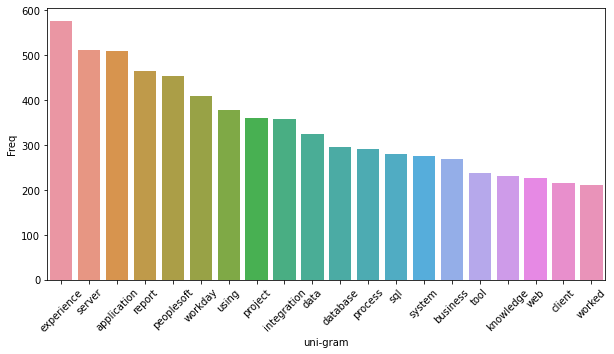

In [137]:
top20_unigram = top1_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_unigram["uni-gram"],y=top20_unigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_unigram["uni-gram"])

## Bi-gram 

+ a 2-gram (which we'll call bigram) is a two-word sequence of words. like “please turn”, “turn your”, or ”your homework”

In [138]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [139]:
top2_words = get_top_n2_words(final_nlp_project["Extracted"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]


In [140]:
top2_df

Bi-gram  Freq
0            application server   124
1                    sql server   117
2             process scheduler   109
3                    web server    94
4              business process    84
5                   people tool    82
6                 custom report    76
7                 server domain    75
8                core connector    73
9              calculated field    70
10               good knowledge    69
11                  workday hcm    67
12               workday studio    66
13                    till date    64
14                      html cs    61
15              year experience    57
16             scheduler server    56
17                  web service    53
18         business requirement    52
19                   server web    51
20                report writer    51
21        experience peoplesoft    50
22              technical skill    50
23           integration broker    48
24              hand experience    48
25           application engine    48
26          role responsibility    45
27             operating system    44
28             change assistant    42
29               server process    41
30              good experience    41
31             inbound outbound    40
32      professional experience    39
33         application designer    39
34                 summary year    38
35                      pvt ltd    37
36                     power bi    37
37         outbound integration    37
38         professional summary    36
39      document transformation    36
40                      day day    35
41               domain process    35
42             stored procedure    35
43               compare report    34
44                  people code    33
45                system window    33
46           production support    32
47           experience working    32
48            integration using    32
49           workday consultant    32
50       peoplesoft application    31
51                   tax update    30
52                   data mover    30
53           performance tuning    29
54          workday integration    29
55        internet architecture    28
56               best knowledge    28
57                     eib core    28
58           client requirement    27
59                     xml xslt    27
60                window server    26
61          peoplesoft internet    26
62               hereby declare    26
63          experience creating    26
64              per requirement    25
65                    hrms fscm    25
66          peoplesoft database    25
67               peoplesoft dba    25
68                  third party    25
69                  file layout    25
70                 report using    25
71                    test case    25
72                cs javascript    25
73            project migration    24
74             peoplesoft admin    24
75                   domain web    24
76                    true best    24
77               security group    24
78              database oracle    23
79               load balancing    23
80         database application    23
81            software engineer    23
82            currently working    23
83               change request    23
84                using workday    23
85            peoplesoft update    22
86               reporting tool    22
87          component interface    22
88                    front end    22
89                  using react    22
90           experience workday    22
91              peoplesoft fscm    21
92               data migration    21
93                sql developer    21
94              role peoplesoft    20
95              work experience    20
96          communication skill    20
97                  people book    20
98             enterprise linux    20
99         technical consultant    20
100          design development    20
101          declaration hereby    20
102             support workday    20
103                   xslt code    20
104              peoplesoft hcm   

[Text(0, 0, 'application server'),
 Text(1, 0, 'sql server'),
 Text(2, 0, 'process scheduler'),
 Text(3, 0, 'web server'),
 Text(4, 0, 'business process'),
 Text(5, 0, 'people tool'),
 Text(6, 0, 'custom report'),
 Text(7, 0, 'server domain'),
 Text(8, 0, 'core connector'),
 Text(9, 0, 'calculated field'),
 Text(10, 0, 'good knowledge'),
 Text(11, 0, 'workday hcm'),
 Text(12, 0, 'workday studio'),
 Text(13, 0, 'till date'),
 Text(14, 0, 'html cs'),
 Text(15, 0, 'year experience'),
 Text(16, 0, 'scheduler server'),
 Text(17, 0, 'web service'),
 Text(18, 0, 'business requirement'),
 Text(19, 0, 'server web')]

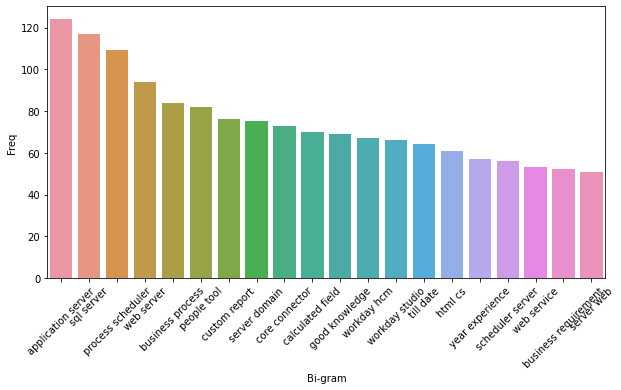

In [141]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

## Tri-gram
+ 3-gram (a trigram) is a three-word sequence of words like “please turn your”, or “turn your homework

In [142]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [143]:
top3_words = get_top_n3_words(final_nlp_project["Extracted"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [144]:
top3_df

Tri-gram  Freq
0                process scheduler server    56
1                       server web server    47
2                server process scheduler    41
3                  application server web    37
4               application server domain    37
5                   server domain process    35
6                domain process scheduler    35
7                 operating system window    33
8                       web server domain    27
9                      eib core connector    27
10       peoplesoft internet architecture    26
11                summary year experience    26
12                      domain web server    24
13                    true best knowledge    24
14             application server process    23
15              professional summary year    23
16                     html cs javascript    22
17           inbound outbound integration    22
18             declaration hereby declare    19
19              peoplesoft update manager    18
20               process scheduler domain    18
21              internet architecture pia    18
22             load balancing application    18
23           balancing application server    18
24             outbound integration using    18
25                     web server process    16
26             hereby declare information    16
27                          using html cs    16
28                        day day support    16
29                    day support workday    16
30                like application server    15
31                 change assistant apply    15
32                     update manager pum    15
33                   scheduler domain web    15
34                   using workday studio    15
35                server like application    14
36                environment people tool    14
37                oracle enterprise linux    14
38                       fscm people tool    14
39                      html cs bootstrap    14
40                    support workday hcm    14
41                  core connector worker    14
42                 multiple domain across    13
43                      bundle tax update    13
44                      till date project    13
45                 per client requirement    13
46                 sql server integration    13
47                  user defined function    13
48              integration using workday    13
49                  workday report writer    13
50              server application server    12
51                         till date role    12
52             year experience peoplesoft    12
53              regular basis maintenance    12
54              basis maintenance process    12
55           dddaudit sysaudit alteraudit    12
56          involved performance database    12
57       performance database application    12
58          database application creating    12
59          application creating multiple    12
60               creating multiple domain    12
61                 domain across instance    12
62             server integration service    12
63                        tool sql server    12
64              hand experience migrating    12
65           enterprise interface builder    12
66                    various server like    11
67             using application designer    11
68              tool application designer    11
69                third party application    11
70              application engine people    11
71                     engine people code    11
72                         june till date    11
73                 compare report various    11
74             report various environment    11
75         maintaining integrity internal    11
76         integrity internal consistency    11
77          internal consistency database    11
78             consistency database using    11
79                database using dddaudit    11
80                using dddaudit sysaudit    11
81             sysaudit alteraudit report    11
82         alteraudit report periodically    11
8

[Text(0, 0, 'process scheduler server'),
 Text(1, 0, 'server web server'),
 Text(2, 0, 'server process scheduler'),
 Text(3, 0, 'application server web'),
 Text(4, 0, 'application server domain'),
 Text(5, 0, 'server domain process'),
 Text(6, 0, 'domain process scheduler'),
 Text(7, 0, 'operating system window'),
 Text(8, 0, 'web server domain'),
 Text(9, 0, 'eib core connector'),
 Text(10, 0, 'peoplesoft internet architecture'),
 Text(11, 0, 'summary year experience'),
 Text(12, 0, 'domain web server'),
 Text(13, 0, 'true best knowledge'),
 Text(14, 0, 'application server process'),
 Text(15, 0, 'professional summary year'),
 Text(16, 0, 'html cs javascript'),
 Text(17, 0, 'inbound outbound integration'),
 Text(18, 0, 'declaration hereby declare'),
 Text(19, 0, 'peoplesoft update manager')]

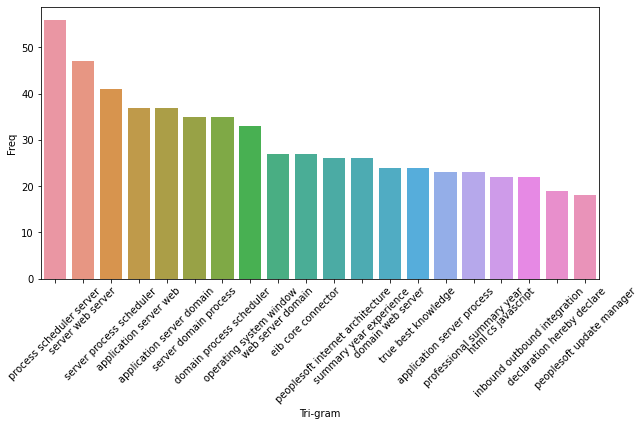

In [145]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# word2vec

In [146]:
word2vec=[nltk.word_tokenize(i) for i in final_nlp_project['Extracted']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(word2vec,min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it


w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [147]:
word2vec

[['anubhav',
  'kumar',
  'singh',
  'core',
  'competency',
  'scripting',
  'shell',
  'scripting',
  'application',
  'peoplesoft',
  'hcm',
  'financials',
  'operating',
  'system',
  'linux',
  'window',
  'web',
  'app',
  'server',
  'weblogic',
  'tuxedo',
  'rdbms',
  'oracle',
  'repository',
  'github',
  'core',
  'competency',
  'scripting',
  'shell',
  'scripting',
  'application',
  'peoplesoft',
  'hcm',
  'financials',
  'operating',
  'system',
  'linux',
  'window',
  'web',
  'app',
  'server',
  'weblogic',
  'tuxedo',
  'rdbms',
  'oracle',
  'repository',
  'github',
  'work',
  'globally',
  'competitive',
  'environment',
  'challenging',
  'assignment',
  'shall',
  'yield',
  'twin',
  'benefit',
  'job',
  'satisfaction',
  'steady',
  'paced',
  'professional',
  'growth',
  'professional',
  'experience',
  'current',
  'hcl',
  'current',
  'role',
  'system',
  'admin',
  'offshore',
  'skill',
  'shell',
  'scripting',
  'linux',
  'peoplesoft',
  'ad

# pos (parts of speech)
+ It is a process of converting a sentence to forms – list of words, list of tuples (where each tuple is having a form (word, tag)). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, and so on.

# label encoding

In [148]:
le = LabelEncoder()
final_nlp_project['Label_Numeric'] = le.fit_transform(final_nlp_project['Label'])

In [149]:
final_nlp_project

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

In [150]:
vector = TfidfVectorizer( smooth_idf=True,sublinear_tf=True)
vector.fit(final_nlp_project['Extracted'])
tfidf_text = vector.transform(final_nlp_project['Extracted'])

In [151]:
tfidf_text.shape

(76, 3855)

# model splitting 
+ train-test-split

In [152]:
X = tfidf_text.toarray()
X
y = final_nlp_project[['Label_Numeric']]


In [153]:
y

Label_Numeric
0               1
1               1
2               1
3               1
4               1
5               1
6               1
7               1
8               1
9               1
10              1
11              1
12              1
13              1
14              1
15              1
16              1
17              1
18              1
19              1
20              2
21              2
22              2
23              2
24              2
25              2
26              2
27              2
28              2
29              2
30              2
31              2
32              2
33              2
34              2
35              2
36              2
37              2
38              2
39              2
40              3
41              3
42              3
43              3
44              3
45              3
46              3
47              3
48              3
49              3
50              3
51              3
52              3
53              3
54              4
55              4
56              4
57              4
58              4
59              4
60              4
61              4
62              4
63              4
64              4
65              4
66              4
67              4
68              4
69              4
70              4
71              4
72              4
73              4
74              0
75              0

# Heat map co relation 


In [154]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,random_state=2 , test_size=0.3,)

In [155]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.         0.03632944 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0805651  0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02538353 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.02785517 0.         ... 0.         0.         0.        ]
 [0.         0.03003514 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
    Label_Numeric
55              4
14              1
27              2
25              2
9               1
21  

In [156]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)


(53, 3855)
(23, 3855)
(23, 1)
(53, 1)


### Models Used For TT For Data 

+ Navie Bayes 
+ Logistic Regression 
+ Decision Tree 
+ Random Forest 
+ XG Boost 
+ K Nearest Neighbours 


## How Does Text Data Works on SKlearn Models , Python ,NLTK

+  Document/Text classification  :-Document/Text classification is one of the important and typical task in supervised machine learning (ML). Assigning categories to documents, which can be a web page, library book, media articles, gallery etc. has many applications like e.g. spam filtering, email routing, sentiment analysis etc. In this article, I would like to demonstrate how we can do text classification using python, scikit-learn and little bit of NLTK.


#### Let’s divide the classification problem into below steps:

+ Prerequisite and setting up the environment.
+ Loading the data set in jupyter.
+ Extracting features from text files.
+ Running ML algorithms.
+ Grid Search for parameter tuning.
+ Useful tips and a touch of NLTK.





# Navie Bayes 

+ Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

# multinomal navie bayes 
 + The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

In [157]:
classifier_mb = MultinomialNB()
classifier_mb.fit(X_train,np.ravel(y_train))
train_pred_m = classifier_mb.predict(X_train)

In [158]:
train_mb_accuracy = accuracy_score(classifier_mb.predict(X_train),y_train)

In [159]:
train_mb_accuracy

0.9811320754716981

In [160]:
test_pred_m =  classifier_mb.predict(X_test)

In [161]:
test_mb_accuracy =accuracy_score(test_pred_m,y_test)

In [162]:
test_mb_accuracy

0.782608695652174

In [163]:
test_mb_precisionscore = precision_score(test_pred_m,y_test,pos_label='positive',
                                           average='micro')

In [164]:
test_mb_precisionscore

0.782608695652174

In [165]:
test_mb_recall = recall_score(test_pred_m,y_test,pos_label='positive',
                                           average='micro')

In [166]:
test_mb_recall

0.782608695652174

# Gaussian navie bayes
+ Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. We have explored the idea behind Gaussian Naive Bayes

In [167]:
classifier_gb = GaussianNB()
classifier_gb.fit(X_train,np.ravel(y_train))
train_classifier_gb = classifier_gb.predict(X_train)

In [168]:
accuracy_score(train_classifier_gb,y_train)

0.9811320754716981

In [169]:
test_classifier_gb = classifier_gb.predict(X_test)

In [170]:
test_gb_accuracy = accuracy_score(test_classifier_gb,y_test)

In [171]:
test_gb_accuracy

0.8695652173913043

In [172]:
test_gb_cm = confusion_matrix(test_classifier_gb,y_test)
print("confusion_matrix",test_gb_cm)
test_gb_reccall = recall_score(test_classifier_gb,y_test,average='macro')
print("Recall",test_gb_reccall)
test_gb_precisionscore = precision_score(test_classifier_gb,y_test,average='macro')
print("precision",test_gb_precisionscore)

confusion_matrix [[0 0 0 0 0]
 [0 4 0 0 0]
 [1 0 5 0 0]
 [0 0 0 5 0]
 [0 2 0 0 6]]
Recall 0.7166666666666667
precision 0.7333333333333333


# Logistic regression
+ Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring. An example of logistic regression could be applying machine learning to determine if a person is likely to be infected with COVID-19 or not

In [173]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,np.ravel(y_train))

LogisticRegression()

In [174]:
logistic_regression_train = logistic_regression.predict(X_train)

In [175]:
logistic_regression_train_accuracy = accuracy_score(logistic_regression_train,y_train)

In [176]:
logistic_regression_train_accuracy

0.9811320754716981

# predictiong for testing data 

In [177]:
logistic_regression_test = logistic_regression.predict(X_test)

In [178]:
logistic_regression_test_accuracy = accuracy_score(logistic_regression_test,np.ravel(y_test))

In [179]:
logistic_regression_test_accuracy

0.8260869565217391

In [180]:
logistic_regression_test_precision = precision_score(logistic_regression_test,np.ravel(y_test),
                                           average='micro')

In [181]:
logistic_regression_test_precision

0.8260869565217391

In [182]:
logistic_regression_test_recall = recall_score(logistic_regression_test,np.ravel(y_test),
                                           average='micro')

In [183]:
logistic_regression_test_recall

0.8260869565217391

# Decision Tree
+ Share. Introduction Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter

In [184]:
decision_tree = DecisionTreeClassifier(criterion= 'gini',max_depth=10)
decision_tree.fit(X_train , np.real(y_train))
decision_tree_train = decision_tree.predict(X_train)

In [185]:
accuracy_score(decision_tree_train,y_train)

0.9811320754716981

In [186]:
confusion_matrix(decision_tree_train,y_train)

array([[ 1,  0,  1,  0,  0],
       [ 0, 14,  0,  0,  0],
       [ 0,  0, 14,  0,  0],
       [ 0,  0,  0,  9,  0],
       [ 0,  0,  0,  0, 14]], dtype=int64)

# Testing data 

In [187]:
decision_tree_test = decision_tree.predict(X_test)

In [188]:
decision_tree_accuracy = accuracy_score(decision_tree_test,y_test)
decision_tree_accuracy

0.782608695652174

In [189]:
confusion_matrix(decision_tree_test,y_test)

array([[0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [1, 2, 5, 2, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 6]], dtype=int64)

In [190]:
decision_tree_test_precision = precision_score(decision_tree_test,y_test,pos_label='positive',
                                           average='micro')
decision_tree_test_precision

0.782608695652174

In [191]:
decision_tree_test_recall = recall_score(decision_tree_test,y_test,pos_label='positive',
                                           average='micro')
decision_tree_test_recall

0.782608695652174

# Gridsearch cv

In [192]:
gridsearch_dt=GridSearchCV(estimator=decision_tree,param_grid={'max_depth':[3,4,5,6]},cv=None,)
gridsearch_dt.fit(X_train,np.real(y_train))

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10),
             param_grid={'max_depth': [3, 4, 5, 6]})

In [193]:
gridsearch_dt_train = gridsearch_dt.predict(X_train)

In [194]:
gridsearch_dt_train_accuracy = accuracy_score(gridsearch_dt_train,y_train)

In [195]:
gridsearch_dt_train_accuracy

0.9811320754716981

# Testing data 

In [196]:
gridsearch_dt_test = gridsearch_dt.predict(X_test)

In [197]:
gridsearch_dt_test_accuracy = accuracy_score(gridsearch_dt_test,y_test)
gridsearch_dt_test_accuracy

0.9130434782608695

In [198]:
gridsearch_dt_test_cm = confusion_matrix(gridsearch_dt_test,y_test)
gridsearch_dt_test_cm

array([[0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0],
       [1, 0, 5, 1, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 6]], dtype=int64)

In [199]:
gridsearch_dt_test_precision = precision_score(gridsearch_dt_test,y_test,average='macro')
gridsearch_dt_test_precision

0.76

In [200]:
gridsearch_dt_test_recall = recall_score(gridsearch_dt_test,y_test,average = 'macro')
gridsearch_dt_test_recall

0.7428571428571429

# KNN (K NEAREST NEIGHBOUR)
+ The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'

In [201]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn.fit(X_train,np.real(y_train))

KNeighborsClassifier()

In [202]:
knn_train = knn.predict(X_train)


In [203]:
knn_train_accuracy = accuracy_score(knn_train , y_train)
knn_train_accuracy

0.9811320754716981

# testing data 

In [204]:
knn_test = knn.predict(X_test)
knn_test_accuracy = accuracy_score(knn_test , y_test)
print("Accuracy Score :", knn_test_accuracy)
knn_test_cm = confusion_matrix(knn_test , y_test)
print('confusion matrix' ,knn_test_cm )
knn_test_precision = precision_score(knn_test,y_test, average= 'macro')
print("precision score ", knn_test_precision)
knn_test_recall = recall_score(knn_test,y_test, average= 'macro')
print("re_call score ", knn_test_recall)

Accuracy Score : 0.9130434782608695
confusion matrix [[0 0 0 0 0]
 [0 5 0 0 0]
 [1 0 5 0 0]
 [0 0 0 5 0]
 [0 1 0 0 6]]
precision score  0.7666666666666667
re_call score  0.7380952380952381


# picking up the best optinum value for k 


In [205]:
import warnings
warnings.filterwarnings('ignore')
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn,X=X,y=np.real(y),cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [206]:
cv_scores

[0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429,
 0.9178571428571429]

In [207]:
neighbours[cv_scores.index(max(cv_scores))]

1

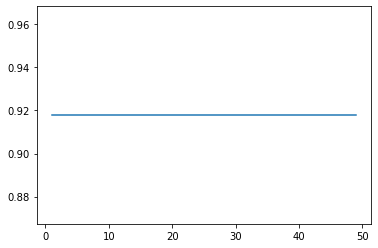

In [208]:
plt.plot(neighbours,cv_scores)
plt.show()

# lets check k = 1

In [209]:
knn_1 = KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn_1.fit(X_train,np.real(y_train))

KNeighborsClassifier(n_neighbors=1)

In [210]:
knn_train_1 = knn_1.predict(X_train)


In [211]:
knn_train_accuracy_1 = accuracy_score(knn_train_1 , y_train)
knn_train_accuracy_1

0.9811320754716981

# Testing data 

In [212]:
knn_test_1 = knn_1.predict(X_test)
knn_test_accuracy_1 = accuracy_score(knn_test_1 , y_test)
print("Accuracy Score :", knn_test_accuracy_1)
knn_test_cm_1 = confusion_matrix(knn_test_1 , y_test)
print('confusion matrix' ,knn_test_cm_1 )
knn_test_precision_1 = precision_score(knn_test_1,y_test, average= 'macro')
print("precision score ", knn_test_precision_1)
knn_test_recall_1 = recall_score(knn_test_1,y_test, average= 'macro')
print("re_call score ", knn_test_recall_1)

Accuracy Score : 0.9130434782608695
confusion matrix [[0 0 0 0 0]
 [0 5 0 0 0]
 [1 0 5 0 0]
 [0 0 0 5 0]
 [0 1 0 0 6]]
precision score  0.7666666666666667
re_call score  0.7380952380952381


# Ensemble Techiqunes 
+ Ensemble learning is the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem. Ensemble learning is primarily used to improve the (classification, prediction, function approximation,

# Random Forest
+ Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [213]:
rf =RandomForestClassifier( n_estimators=100,
   
    criterion='gini',
    max_depth=10,)
rf.fit(X_train, np.real(y_train))

RandomForestClassifier(max_depth=10)

In [214]:
rf_train = rf.predict(X_train)

In [215]:
rf_train_accracy = accuracy_score(rf_train, y_train)

In [216]:
rf_train_accracy

0.9811320754716981

## Testing with Random Forest

In [217]:
rf_test = rf.predict(X_test)
re_test_accuracy = accuracy_score(rf_test , y_test)
print("Accuracy Score :", re_test_accuracy)
re_test_cm = confusion_matrix(rf_test , y_test)
print('confusion matrix' ,re_test_cm )
re_test_precision = precision_score(rf_test,y_test, average= 'macro')
print("precision score ", re_test_precision)
re_test_recall = recall_score(rf_test,y_test, average= 'macro')
print("re_call score ", re_test_recall)

Accuracy Score : 0.9130434782608695
confusion matrix [[0 0 0 0 0]
 [0 6 0 0 0]
 [1 0 5 1 0]
 [0 0 0 4 0]
 [0 0 0 0 6]]
precision score  0.76
re_call score  0.7428571428571429


# SVC (Support Vector Machine Classifier)
+ The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.
# Linear
+ Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of Features in a particular Data Set.

In [218]:
svm_linear = SVC(kernel = 'linear',C=1.0)
svm_linear.fit(X_train , np.ravel(y_train))

SVC(kernel='linear')

In [219]:
svm_linear_train = svm_linear.predict(X_train)

In [220]:
svm_linear_train_accuracy = accuracy_score(svm_linear_train,y_train)
svm_linear_train_accuracy

0.9811320754716981

# Testing on data 

In [221]:
svm_test_linear = svm_linear.predict(X_test)
svm_test_accuracy_linear = accuracy_score(svm_test_linear , y_test)
print("Accuracy Score :", svm_test_accuracy_linear)
svm_test_cm_linear = confusion_matrix(svm_test_linear , y_test)
print('confusion matrix' ,svm_test_cm_linear )
svm_test_precision_linear = precision_score(svm_test_linear,y_test, average= 'macro')
print("precision score ", svm_test_precision_linear)
svm_test_recall_linear = recall_score(svm_test_linear,y_test, average= 'macro')
print("re_call score ", svm_test_recall_linear)

Accuracy Score : 0.9130434782608695
confusion matrix [[0 0 0 0 0]
 [0 6 0 0 0]
 [1 0 5 1 0]
 [0 0 0 4 0]
 [0 0 0 0 6]]
precision score  0.76
re_call score  0.7428571428571429


# Poly

+ In machine learning, the polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.

In [222]:
svm_poly = SVC(kernel= 'poly')
svm_poly.fit(X_train,np.real(y_train))

SVC(kernel='poly')

In [223]:
svm_poly_train = svm_poly.predict(X_train)

In [224]:
svm_poly_train_accuracy = accuracy_score(svm_poly_train,y_train)
svm_linear_train_accuracy

0.9811320754716981

# Testing data 

In [225]:
svm_test_poly = svm_poly.predict(X_test)
svm_test_accuracy_poly = accuracy_score(svm_test_poly , y_test)
print("Accuracy Score :", svm_test_accuracy_poly)
svm_test_cm_poly = confusion_matrix(svm_test_poly , y_test)
print('confusion matrix' ,svm_test_cm_linear )
svm_test_precision_poly = precision_score(svm_test_poly,y_test, average= 'macro')
print("precision score ", svm_test_precision_poly)
svm_test_recall_poly = recall_score(svm_test_poly,y_test, average= 'macro')
print("re_call score ", svm_test_recall_poly)

Accuracy Score : 0.6086956521739131
confusion matrix [[0 0 0 0 0]
 [0 6 0 0 0]
 [1 0 5 1 0]
 [0 0 0 4 0]
 [0 0 0 0 6]]
precision score  0.5
re_call score  0.4714285714285714


# RBF (Radial Basis Function)
+ In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification.

In [226]:
svc_rbf_gs = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.1,0.01,0.02,0.002,10,20],'C':[1.0] }]
model_rbf_ff_1 = GridSearchCV(svc_rbf_gs,param_grid,cv=10)
model_rbf_ff_1.fit(X_train,np.real(y_train))

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1, 0.01, 0.02, 0.002, 10, 20],
                          'kernel': ['rbf']}])

In [227]:
model_rbf_ff_1.best_score_ , model_rbf_ff_1.best_params_

(0.41, {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'})

In [228]:
svc_rbf = SVC(kernel= 'rbf',gamma=0.1, C=1.0)
svc_rbf.fit(X_train,np.real(y_train))

SVC(gamma=0.1)

In [229]:
svc_rbf_train = svc_rbf.predict(X_train)

In [230]:
svc_rbf_train_accuracy = accuracy_score(svc_rbf_train,y_train)
svc_rbf_train_accuracy

0.4528301886792453

# Testing Data 

In [231]:
svm_test_rbf = svc_rbf.predict(X_test)
svm_test_accuracy_rbf = accuracy_score(svm_test_rbf , y_test)
print("Accuracy Score :", svm_test_accuracy_rbf)
svm_test_cm_rbf = confusion_matrix(svm_test_rbf , y_test)
print('confusion matrix' ,svm_test_cm_rbf )
svm_test_precision_rbf = precision_score(svm_test_rbf,y_test, average= 'macro')
print("precision score ", svm_test_precision_poly)
svm_test_recall_rbf = recall_score(svm_test_rbf,y_test, average= 'macro')
print("re_call score ", svm_test_recall_poly)

Accuracy Score : 0.2608695652173913
confusion matrix [[0 0 0 0 0]
 [0 0 0 0 0]
 [1 6 5 5 5]
 [0 0 0 0 0]
 [0 0 0 0 1]]
precision score  0.5
re_call score  0.4714285714285714


# Xg Boost
+ XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [232]:
xg_boost = xgb.XGBClassifier(n_estimators=200,
    max_depth = 7 , min_child_weight =6,subsample = 0.8,nthread=10, learning_rate=0.1)
xg_boost.fit(X_train ,np.real(y_train))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=10, nthread=10, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [233]:
xg_boost.fit(X_train,np.real(y_train))
xg_boost.predict(X_train)

array([4, 1, 2, 2, 1, 2, 4, 4, 4, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 3, 1, 4,
       1, 4, 2, 1, 4, 2, 4, 4, 4, 3, 4, 3, 1, 2, 1, 2, 2, 3, 4, 2, 2, 4,
       3, 3, 2, 1, 3, 2, 4, 1, 3], dtype=int64)

In [234]:
accuracy_score_train_xgboost = accuracy_score(xg_boost.predict(X_train),y_train)
accuracy_score_train_xgboost

0.9811320754716981

# Testing Data

In [235]:
xg_boost_test  = xg_boost.predict(X_test)
xgboost_test_accuracy = accuracy_score(xg_boost_test , y_test)
print("Accuracy Score :", xgboost_test_accuracy)
xgboost_test_cm = confusion_matrix(xg_boost_test , y_test)
print('confusion matrix' ,xgboost_test_cm )
xgboost_test_precision = precision_score(xg_boost_test,y_test, average= 'macro')
print("precision score ", xgboost_test_precision)
xgboost_test_recall = recall_score(xg_boost_test,y_test, average= 'macro')
print("re_call score ", xgboost_test_recall)

Accuracy Score : 0.9565217391304348
confusion matrix [[0 0 0 0 0]
 [0 6 0 0 0]
 [1 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 6]]
precision score  0.8
re_call score  0.7666666666666667


In [236]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3855, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [237]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,np.real(y_train))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.273 total time=   1.9s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.182 total time=   1.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.182 total time=   0.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.200 total time=   1.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.200 total time=   0.9s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.182 total time=   1.3s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.182 total time=   1.4s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.200 total time=   1.4s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.200 total time=   1.4s


In [238]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.207272732257843, using {'batch_size': 10, 'epochs': 10}
0.207272732257843,0.03372225033662457 with: {'batch_size': 10, 'epochs': 10}
0.207272732257843,0.03372225033662457 with: {'batch_size': 10, 'epochs': 50}
0.207272732257843,0.03372225033662457 with: {'batch_size': 10, 'epochs': 100}
0.207272732257843,0.03372225033662457 with: {'batch_size': 20, 'epochs': 10}
0.207272732257843,0.03372225033662457 with: {'batch_size': 20, 'epochs': 50}
0.207272732257843,0.03372225033662457 with: {'batch_size': 20, 'epochs': 100}
0.207272732257843,0.03372225033662457 with: {'batch_size': 40, 'epochs': 10}
0.207272732257843,0.03372225033662457 with: {'batch_size': 40, 'epochs': 50}
0.207272732257843,0.03372225033662457 with: {'batch_size': 40, 'epochs': 100}


In [239]:
train_pred_gs_keras = grid.predict(X_train)

In [240]:
train_pred_gs_keras_train_accuracy = accuracy_score( grid.predict(X_train),y_train)
train_pred_gs_keras_train_accuracy

0.2641509433962264

# testing Data


In [241]:
test_pred_gs_keras = grid.predict(X_test)
keras_test_accuracy_ = accuracy_score(test_pred_gs_keras , y_test)
print("Accuracy Score :", keras_test_accuracy_)
keras_test_cm = confusion_matrix(test_pred_gs_keras , y_test)
print('confusion matrix' ,keras_test_cm )
keras_test_precision = precision_score(test_pred_gs_keras,y_test, average= 'macro')
print("precision score ", keras_test_precision)
keras_test_recall = recall_score(test_pred_gs_keras,y_test, average= 'macro')
print("re_call score ", keras_test_recall)

Accuracy Score : 0.2608695652173913
confusion matrix [[0 0 0 0 0]
 [1 6 5 5 6]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
precision score  0.2
re_call score  0.05217391304347826


+ removing layers and droupouts

In [242]:
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 3855,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 3855,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 30)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid1 = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid1.fit(X_train,np.real(y_train))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.273 total time=   1.1s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.182 total time=   1.2s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.182 total time=   1.2s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.200 total time=   2.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.200 total time=   1.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [243]:
grid1_train_keras = grid1.predict(X_train)
grid1_train_keras_accracy = accuracy_score(grid1_train_keras,y_train)
grid1_train_keras_accracy

0.2641509433962264

# checking accuracy with count vectorizer 

In [244]:
vectorizer_feature = CountVectorizer()
cv_model_development = vectorizer_feature.fit(final_nlp_project['Extracted'])

In [245]:
print("Vocabulary: ", cv_model_development.vocabulary_)


Vocabulary:  {'anubhav': 186, 'kumar': 1895, 'singh': 3159, 'core': 774, 'competency': 655, 'scripting': 3049, 'shell': 3118, 'application': 199, 'peoplesoft': 2482, 'hcm': 1541, 'financials': 1328, 'operating': 2352, 'system': 3398, 'linux': 1964, 'window': 3788, 'web': 3761, 'app': 193, 'server': 3091, 'weblogic': 3763, 'tuxedo': 3579, 'rdbms': 2791, 'oracle': 2365, 'repository': 2888, 'github': 1442, 'work': 3804, 'globally': 1451, 'competitive': 657, 'environment': 1182, 'challenging': 545, 'assignment': 258, 'shall': 3111, 'yield': 3843, 'twin': 3581, 'benefit': 371, 'job': 1826, 'satisfaction': 3012, 'steady': 3294, 'paced': 2411, 'professional': 2660, 'growth': 1501, 'experience': 1248, 'current': 835, 'hcl': 1540, 'role': 2968, 'admin': 62, 'offshore': 2328, 'skill': 3172, 'administration': 67, 'managing': 2041, 'fscm': 1393, 'production': 2656, 'along': 129, 'support': 3367, 'installed': 1727, 'involved': 1784, 'day': 873, 'activity': 44, 'project': 2672, 'migration': 2133, 'd

In [246]:
cv_model_development_1 = vectorizer.transform(final_nlp_project['Extracted'])
cv_model_development_1

<76x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 10374 stored elements in Compressed Sparse Row format>

In [247]:
cv_model_development_1.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02832429, 0.04239999, 0.        , ..., 0.        , 0.14554633,
        0.        ],
       [0.        , 0.        , 0.04610171, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10703495, ..., 0.        , 0.        ,
        0.        ]])

In [248]:
X_cv= cv_model_development_1

In [249]:
y_cv = final_nlp_project['Label_Numeric']

In [250]:
print(X_cv.shape ,y_cv.shape)

(76, 1000) (76,)


In [251]:
X_train_cv , X_test_cv,y_train_cv,y_test_cv = train_test_split(X_cv,y_cv,random_state=12,test_size=0.25,shuffle=True)

In [252]:
print(X_train_cv , X_test_cv,y_train_cv,y_test_cv)

  (0, 997)	0.0604459345692699
  (0, 994)	0.043891405497724
  (0, 990)	0.462172012151921
  (0, 976)	0.14119775223254344
  (0, 974)	0.048763349802159246
  (0, 960)	0.06753504617332878
  (0, 948)	0.04768873390266907
  (0, 939)	0.03861040825515743
  (0, 936)	0.05375836293686272
  (0, 932)	0.04070450672451283
  (0, 931)	0.06753504617332878
  (0, 910)	0.03612272162565273
  (0, 905)	0.0604459345692699
  (0, 903)	0.04768873390266907
  (0, 894)	0.07591738481476279
  (0, 878)	0.0625400330386253
  (0, 872)	0.05110435272098602
  (0, 868)	0.03671606576455669
  (0, 866)	0.05682219287980566
  (0, 856)	0.06488103595745208
  (0, 855)	0.05682219287980566
  (0, 852)	0.3005619616824319
  (0, 843)	0.03391205066620301
  (0, 839)	0.06753504617332878
  (0, 834)	0.05238709149162348
  :	:
  (56, 409)	0.296332293570756
  (56, 405)	0.13298584739964128
  (56, 401)	0.08983041994914637
  (56, 389)	0.08608337283196342
  (56, 386)	0.09626436037335308
  (56, 337)	0.0703134671673406
  (56, 294)	0.1272145654237126
  (56,

In [253]:
X_train_cv.toarray(),X_test_cv.toarray()

(array([[0.        , 0.        , 0.05682219, ..., 0.06044593, 0.        ,
         0.        ],
        [0.01808512, 0.05414498, 0.        , ..., 0.        , 0.11616459,
         0.        ],
        [0.01871118, 0.19606765, 0.        , ..., 0.        , 0.07211153,
         0.03480068],
        ...,
        [0.03390437, 0.        , 0.        , ..., 0.01079795, 0.        ,
         0.        ],
        [0.09785753, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.10703495, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.04790554, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.03229944, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.02663098, 0.        , 0.        , ..., 0.04240753, 0.23947902,
         0.        ],
        [0. 

# Model fitting using cv

In [254]:
classifier_mb_cv = MultinomialNB()
classifier_mb_cv.fit(X_train_cv, np.real(y_train_cv))

MultinomialNB()

In [255]:
classifier_mb_train_cv = classifier_mb_cv.predict(X_train_cv)

In [256]:
classifier_mb_train_cv_accuracy = accuracy_score(classifier_mb_train_cv,y_train_cv)
classifier_mb_train_cv_accuracy

0.9649122807017544

# Testing data for cv

In [257]:
classifier_mb_test_cv = classifier_mb_cv.predict(X_test_cv)
classifier_mb_test_cv_accuracy_ = accuracy_score(classifier_mb_test_cv , y_test_cv)
print("Accuracy Score :", classifier_mb_test_cv_accuracy_)
classifier_mb_test_cv_cm = confusion_matrix(classifier_mb_test_cv , y_test_cv)
print('confusion matrix' ,classifier_mb_test_cv_cm )
classifier_mb_test_cv_precision = precision_score(classifier_mb_test_cv,y_test_cv, average= 'macro')
print("precision score ", classifier_mb_test_cv_precision)
classifier_mb_test_cv_recall = recall_score(classifier_mb_test_cv,y_test_cv, average= 'macro')
print("re_call score ", classifier_mb_test_cv_recall)

Accuracy Score : 1.0
confusion matrix [[4 0 0 0]
 [0 5 0 0]
 [0 0 4 0]
 [0 0 0 6]]
precision score  1.0
re_call score  1.0


# checking with Gaussion Distrubation

In [258]:
classifier_gb_cv = GaussianNB()
classifier_gb_cv.fit(X_train_cv.toarray(), np.real(y_train_cv))

GaussianNB()

In [259]:
classifier_gb_cv_train = classifier_gb_cv.predict(X_train_cv.toarray())

In [260]:
classifier_gb_cv_train_accracy = accuracy_score(classifier_gb_cv_train,y_train_cv)
classifier_gb_cv_train_accracy

0.9824561403508771

# Testing data 

In [261]:
classifier_gb_cv_test = classifier_gb_cv.predict(X_test_cv.toarray())
classifier_gb_cv_test_accuracy_ = accuracy_score(classifier_gb_cv_test , y_test_cv)
print("Accuracy Score :", classifier_gb_cv_test_accuracy_)
classifier_gb_cv_test_cm = confusion_matrix(classifier_gb_cv_test,y_test_cv)
print("Confusion Matrix" , classifier_gb_cv_test_cm)
classifier_gb_cv_test_precision = precision_score(classifier_gb_cv_test , y_test_cv,average='macro')
print("precision _score" , classifier_gb_cv_test_precision)
classifier_gb_cv_test_recall = recall_score(classifier_gb_cv_test,y_test_cv,average='macro')
print("recall score " , classifier_gb_cv_test_recall)



Accuracy Score : 0.8947368421052632
Confusion Matrix [[4 0 2 0]
 [0 5 0 0]
 [0 0 2 0]
 [0 0 0 6]]
precision _score 0.875
recall score  0.9166666666666666


# checking with knn

In [262]:
knn_cv = KNeighborsClassifier(n_neighbors=5,  weights='uniform')

In [263]:
knn_cv.fit(X_train_cv,(y_train_cv))

KNeighborsClassifier()

In [264]:
knn_cv_train = knn_cv.predict(X_train_cv)
knn_cv_train_accuracy = accuracy_score(knn_cv_train,y_train_cv)
knn_cv_train_accuracy

0.9649122807017544

# Testing data 

In [265]:
knn_cv_test = knn_cv.predict(X_test_cv)
knn_cv_test_accuracy = accuracy_score(knn_cv_test , y_test_cv)
print("Accuracy Score :", knn_cv_test_accuracy)
knn_cv_test_cm = confusion_matrix(knn_cv_test,y_test_cv)
print("Confusion Matrix" , knn_cv_test_cm)
knn_cv_test_precision = precision_score(knn_cv_test , y_test_cv,average='macro')
print("precision _score" , knn_cv_test_precision)
knn_cv_test_recall = recall_score(knn_cv_test,y_test_cv,average='macro')
print("recall score " , knn_cv_test_recall)



Accuracy Score : 1.0
Confusion Matrix [[4 0 0 0]
 [0 5 0 0]
 [0 0 4 0]
 [0 0 0 6]]
precision _score 1.0
recall score  1.0


# knn value = 3

In [266]:
knn_cv_3 = KNeighborsClassifier(n_neighbors=3,  weights='uniform')
knn_cv_3.fit(X_train_cv,y_train_cv)

KNeighborsClassifier(n_neighbors=3)

In [267]:
knn_cv_train_3 = knn_cv_3.predict(X_train_cv)
knn_cv_train_accuracy_3 = accuracy_score(knn_cv_train_3,y_train_cv)
knn_cv_train_accuracy_3

0.9649122807017544

# Testing Data

In [268]:
knn_cv_3_test = knn_cv_3.predict(X_test_cv)
knn_cv_3_test_accuracy = accuracy_score(knn_cv_3_test,y_test_cv)
print("accuracy_score",knn_cv_3_test_accuracy)
knn_cv_3_test_cm = confusion_matrix(knn_cv_3_test,y_test_cv)
print("confusion_ matrix", knn_cv_3_test_cm)
knn_cv_3_test_precision = precision_score(knn_cv_3_test,y_test_cv,average="macro")
print("precision_score", knn_cv_3_test_precision)
knn_cv_3_test_recall = recall_score(knn_cv_3_test,y_test_cv,average='macro')
print("recall_score", knn_cv_3_test_recall)

accuracy_score 1.0
confusion_ matrix [[4 0 0 0]
 [0 5 0 0]
 [0 0 4 0]
 [0 0 0 6]]
precision_score 1.0
recall_score 1.0


# Best optinum number 

In [269]:
neighbours = list(range(1,50,2))
cv_scores_1 = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score_1 = cross_val_score(estimator = knn,X=X_cv,y=np.real(y),cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores_1.append(cv_score_1.mean())

In [270]:
cv_scores_1

[0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975]

In [271]:
neighbours[cv_scores_1.index(max(cv_scores_1))]

1

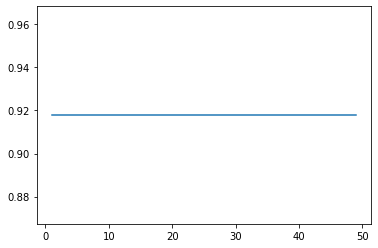

In [272]:
plt.plot(neighbours,cv_scores)
plt.show()

# Logistic regression

In [273]:
lr_cv = LogisticRegression(random_state=12)
lr_cv.fit(X_train_cv,y_train_cv)

LogisticRegression(random_state=12)

In [274]:
 lr_cv_train = lr_cv.predict(X_train_cv)
lr_cv_train_accuracy = accuracy_score(lr_cv_train,y_train_cv)
lr_cv_train_accuracy

0.9649122807017544

# Testing Data 

In [275]:
lr_cv_test = lr_cv.predict(X_test_cv)
lr_cv_test_cm = confusion_matrix(lr_cv_test, y_test_cv)
print("confusion_matrix ", lr_cv_test_cm)
lr_cv_test_accuracy = accuracy_score(lr_cv_test, y_test_cv,)
print("accurac_score", lr_cv_test_accuracy)
lr_cv_test_recall = recall_score(lr_cv_test, y_test_cv, average="macro")
print("recall_score", lr_cv_test_recall)
lr_cv_test_precision = precision_score(lr_cv_test, y_test_cv, average="macro")
print("recall_score", lr_cv_test_precision)

confusion_matrix  [[4 0 0 0]
 [0 5 0 0]
 [0 0 4 0]
 [0 0 0 6]]
accurac_score 1.0
recall_score 1.0
recall_score 1.0


## Decision Tree\

In [276]:
dr_cv = DecisionTreeClassifier()
dr_cv .fit(X_train_cv,y_train_cv)

DecisionTreeClassifier()

In [277]:
 dr_cv_train =dr_cv.predict(X_train_cv)
dr_cv_train_accuracy = accuracy_score(dr_cv_train,y_train_cv)
dr_cv_train_accuracy

0.9824561403508771

# Testing Data

In [278]:
dr_cv_test = dr_cv.predict(X_test_cv)
dr_cv_test_cm = confusion_matrix(dr_cv_test, y_test_cv)
print("confusion_matrix ", dr_cv_test_cm)
dr_cv_test_accuracy = accuracy_score(dr_cv_test, y_test_cv,)
print("accurac_score", dr_cv_test_accuracy)
dr_cv_test_recall = recall_score(dr_cv_test, y_test_cv, average="macro")
print("recall_score", dr_cv_test_recall)
dr_cv_test_precision = precision_score(dr_cv_test, y_test_cv, average="macro")
print("recall_score", dr_cv_test_precision)

confusion_matrix  [[0 0 2 0 0]
 [0 4 0 0 0]
 [0 0 3 1 1]
 [0 0 0 3 0]
 [0 0 0 0 5]]
accurac_score 0.7894736842105263
recall_score 0.72
recall_score 0.6366666666666667


# Grid search cv

In [279]:
gridsearch_dt_cv=GridSearchCV(estimator=decision_tree,param_grid={'max_depth':[3,4,5,6]},cv=None,)
gridsearch_dt_cv.fit(X_train_cv,y_train_cv)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10),
             param_grid={'max_depth': [3, 4, 5, 6]})

In [280]:
gridsearch_dt_cv.best_params_,gridsearch_dt.best_score_

({'max_depth': 3}, 0.9800000000000001)

In [281]:
gridsearch_dt_train_cv = gridsearch_dt_cv.predict(X_train_cv)
gridsearch_dt_train_accuracy_cv = accuracy_score(gridsearch_dt_train_cv,y_train_cv)
gridsearch_dt_train_accuracy_cv

0.9649122807017544

# Testing Data

In [282]:
gridsearch_dt_test_cv = gridsearch_dt_cv.predict(X_test_cv)
gridsearch_dt_test_cm_cv = confusion_matrix(gridsearch_dt_test_cv, y_test_cv)
print("confusion_matrix ", gridsearch_dt_test_cm_cv)
gridsearch_dt_test_accuracy_cv = accuracy_score(gridsearch_dt_test_cv, y_test_cv)
print("accurac_score", gridsearch_dt_test_accuracy_cv)
gridsearch_dt_test_recall_cv = recall_score(gridsearch_dt_test_cv, y_test_cv, average="macro")
print("recall_score", gridsearch_dt_test_recall_cv)
gridsearch_dt_test_precision_score_cv = precision_score(gridsearch_dt_test_cv, y_test_cv, average="macro")
print("precision_score", gridsearch_dt_test_precision_score_cv)

confusion_matrix  [[4 0 0 0]
 [0 5 0 1]
 [0 0 4 0]
 [0 0 0 5]]
accurac_score 0.9473684210526315
recall_score 0.9583333333333334
precision_score 0.9583333333333334


# random  forest 

In [283]:
rf_cv = RandomForestClassifier(n_estimators=100,criterion='gini')
rf_cv.fit(X_train_cv,y_train_cv)


RandomForestClassifier()

In [284]:
rf_cv_train = rf_cv.predict(X_train_cv)
rf_cv_train_accuracy = accuracy_score(rf_cv_train,y_train_cv)

In [285]:
rf_cv_train_accuracy

0.9824561403508771

# Testing Data 

In [286]:
rf_cv_test = rf_cv.predict(X_test_cv)
rf_cv_test_cm = confusion_matrix(rf_cv_test,y_test_cv)
print("confusion_matrix",rf_cv_test_cm)
rf_cv_test_accuracy = accuracy_score(rf_cv_test,y_test_cv)
print("accuracy_score",rf_cv_test_accuracy)
rf_cv_test_precision_score = precision_score(rf_cv_test,y_test_cv,average='micro')
print("precision_score",rf_cv_test_precision_score)
rf_cv_test_recall = recall_score(rf_cv_test,y_test_cv,average='macro')
print("recall_score",rf_cv_test_recall)


confusion_matrix [[4 0 0 0]
 [0 5 0 0]
 [0 0 4 0]
 [0 0 0 6]]
accuracy_score 1.0
precision_score 1.0
recall_score 1.0


# Xg Boost 
## Parameter Tunning to  overcome OverFitting Problem 

+ max_depth =  Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth

+ min_child_width =  min_child_weight parameter in xgboost is given as the: minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning

+  subsample = Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.


In [287]:
Xg_cv = xgb.XGBClassifier(n_estimators=100,
    max_depth = 10 , min_child_weight =6,subsample = 1)
Xg_cv.fit(X_train_cv,y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [288]:
Xg_cv.predict(X_train_cv)
xg_cv_train_accuracy = accuracy_score(Xg_cv.predict(X_train_cv) , y_train_cv)
xg_cv_train_accuracy

0.9473684210526315

# Testing Data 

In [289]:
Xg_cv_test = Xg_cv.predict(X_test_cv)
Xg_cv_test_cm = confusion_matrix(Xg_cv_test,y_test_cv)
print("confusion_matrix",Xg_cv_test_cm)
Xg_cv_test_accuracy = accuracy_score(Xg_cv_test,y_test_cv)
print("accuracy_score",Xg_cv_test_accuracy)
Xg_cv_test_precision_score = precision_score(Xg_cv_test,y_test_cv,average='micro')
print("precision_score",Xg_cv_test_precision_score)
Xg_cv_test_recall = recall_score(Xg_cv_test,y_test_cv,average='macro')
print("recall_score",Xg_cv_test_recall)


confusion_matrix [[4 0 0 1]
 [0 5 0 0]
 [0 0 4 0]
 [0 0 0 5]]
accuracy_score 0.9473684210526315
precision_score 0.9473684210526315
recall_score 0.95


# Support Vector Machine 

In [290]:
svc_cv = SVC(kernel='linear')
svc_cv.fit(X_train_cv,y_train_cv)
svc_cv_train = svc_cv.predict(X_train_cv)
svc_cv_train_accuracy = accuracy_score(svc_cv_train,y_train_cv)
svc_cv_train_accuracy

0.9649122807017544

# Testing Data

In [291]:
svc_cv_test = svc_cv.predict(X_test_cv)
svc_cv_test_accuracy = accuracy_score(svc_cv_test,y_test_cv)
print("accuracy_score", svc_cv_test_accuracy)
svc_cv_test_cm = confusion_matrix(svc_cv_test,y_test_cv)
print("confusion_martix", svc_cv_test_cm)
svc_cv_test_precision_score  = precision_score(svc_cv_test,y_test_cv,average='macro')
print("precision_score", svc_cv_test_precision_score)
svc_cv_test_recall  = recall_score(svc_cv_test,y_test_cv,average='macro')
print("recall_score", svc_cv_test_recall)

accuracy_score 1.0
confusion_martix [[4 0 0 0]
 [0 5 0 0]
 [0 0 4 0]
 [0 0 0 6]]
precision_score 1.0
recall_score 1.0


# scv_rbf

In [292]:
svc_rbf_gs = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.1,0.01,0.02,0.002,10,20],'C':[1.0] }]
model_rbf_cv_1 = GridSearchCV(svc_rbf_gs,param_grid,cv=10)
model_rbf_cv_1.fit(X_train_cv,y_train_cv)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1, 0.01, 0.02, 0.002, 10, 20],
                          'kernel': ['rbf']}])

In [293]:
model_rbf_cv_1.best_params_,model_rbf_cv_1.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}, 0.7733333333333332)

In [294]:
model_rbf_cv_1_train = model_rbf_cv_1.predict(X_train_cv)
model_rbf_cv_1_train_accuracy  = accuracy_score(model_rbf_cv_1_train,y_train_cv)
model_rbf_cv_1_train_accuracy

0.8596491228070176

# Testing data

In [295]:
model_rbf_cv_1_test = model_rbf_cv_1.predict(X_test_cv)
model_rbf_cv_1_test_accuracy = accuracy_score(model_rbf_cv_1_test,y_test_cv)
print("accuracy_score", model_rbf_cv_1_test_accuracy)
model_rbf_cv_1_test_cm = confusion_matrix(model_rbf_cv_1_test,y_test_cv)
print("confusion_matrix", model_rbf_cv_1_test_cm)
model_rbf_cv_1_test_precision_score  = precision_score(model_rbf_cv_1_test,y_test_cv,average='macro')
print("precision-score", model_rbf_cv_1_test_precision_score)
model_rbf_cv_1_test_recall  = recall_score(model_rbf_cv_1_test,y_test_cv,average='macro')
print("recall_score", model_rbf_cv_1_test_recall)

accuracy_score 0.7894736842105263
confusion_matrix [[4 0 4 0]
 [0 5 0 0]
 [0 0 0 0]
 [0 0 0 6]]
precision-score 0.75
recall_score 0.625


# svc_poly

In [296]:
svc_cv_poly = SVC(kernel= 'poly')
svc_cv_poly.fit(X_train_cv,y_train_cv)

SVC(kernel='poly')

In [297]:
svc_poly_cv_train = svc_cv_poly.predict(X_train_cv)
svc_poly_cv_train_accuracy = accuracy_score(svc_poly_cv_train,y_train_cv)
svc_poly_cv_train_accuracy

0.9824561403508771

# Testing data 

In [298]:
svc_poly_cv_test = svc_cv_poly.predict(X_test_cv)
svc_poly_cv_test_accuracy = accuracy_score(svc_poly_cv_test,y_test_cv)
print("accuracy_score", svc_poly_cv_test_accuracy)
svc_poly_cv_test_cm = confusion_matrix(svc_poly_cv_test,y_test_cv)
print("confusion_matrix", svc_poly_cv_test_cm)
svc_poly_cv_test_precision_score  = precision_score(svc_poly_cv_test,y_test_cv,average='macro')
print("precision_score", svc_poly_cv_test_precision_score)
svc_poly_cv_test_recall  = recall_score(svc_poly_cv_test,y_test_cv,average='macro')
print("recall_score", svc_poly_cv_test_recall)

accuracy_score 0.8947368421052632
confusion_matrix [[4 0 0 0]
 [0 5 2 0]
 [0 0 2 0]
 [0 0 0 6]]
precision_score 0.875
recall_score 0.9285714285714286


# word2vec
+ Word2Vec creates vectors of the words that are distributed numerical representations of word features – these word features could comprise of words that represent the context of the individual words present in our vocabulary. Word embeddings eventually help in establishing the association of a word with another similar meaning word through the created vectors.



In [299]:
nlp_w = final_nlp_project['Extracted'].str.split()
nlp_w


0     [anubhav, kumar, singh, core, competency, scri...
1     [g, ananda, rayudu, com, anandgudapati, profil...
2     [peoplesoft, database, administrator, gangared...
3     [classification, internal, classification, int...
4     [priyanka, ramadoss, mountpleasant, coonoor, n...
5     [sirazuddin, bangalore, india, sirazuddin, ban...
6     [peoplesoft, administrator, srinivas, k, exper...
7     [peoplesoft, admin, varkala, vikas, career, ob...
8     [vinod, akkala, peoplesoft, dba, admin, profes...
9     [peoplesoft, admin, peoplesoft, dba, ganesh, a...
10    [peoplesoft, administration, vivekanand, sayan...
11    [arun, venu, experience, summary, experience, ...
12    [personal, detail, name, pritam, biswas, date,...
13    [rahul, ahuja, summary, year, experience, peop...
14    [hari, narayana, professional, summary, year, ...
15    [murali, professional, summary, year, experien...
16    [priyabrata, hota, career, objective, pursuing...
17    [r, ahmed, peoplesoft, technical, consulta

In [300]:
modelw = MeanEmbeddingVectorizer(w2v)
nlp_w2v = modelw.transform(nlp_w)

In [301]:
nlp_w2v

array([[-0.14094865,  0.34286055,  0.20105061, ..., -0.21065706,
         0.13052996, -0.10903414],
       [-0.1338873 ,  0.32898223,  0.19030398, ..., -0.19997214,
         0.12545434, -0.10053255],
       [-0.1465783 ,  0.35418615,  0.20753121, ..., -0.21886706,
         0.13297078, -0.11456259],
       ...,
       [-0.14183985,  0.3677557 ,  0.21208322, ..., -0.21684565,
         0.14368553, -0.100522  ],
       [-0.1364696 ,  0.35609713,  0.15768291, ..., -0.23661967,
         0.15211087, -0.06522197],
       [-0.09528991,  0.24306767,  0.13557   , ..., -0.15138723,
         0.09793593, -0.06221364]], dtype=float32)

In [302]:
X_train_w2v , X_test_w2v , y_train_w2v ,y_test_w2v = train_test_split(nlp_w2v,y , random_state=0 , test_size= 0.25)

In [303]:
print(X_train_w2v.shape , X_test_w2v.shape , y_train_w2v.shape ,y_test_w2v.shape)

(57, 100) (19, 100) (57, 1) (19, 1)


# Model  Fitting with word2vec


# Logistic Regression

In [304]:
le_w2v = LogisticRegression()
le_w2v.fit(X_train_w2v,y_train_w2v)
le_w2v_train = le_w2v.predict(X_train_w2v)
le_w2v_train_accuracy = accuracy_score(le_w2v.predict(X_train_w2v),y_train_w2v)
le_w2v_train_accuracy

0.45614035087719296

# Testing Data

In [305]:
le_w2v_test = le_w2v.predict(X_test_w2v)
le_w2v_test_accuracy = accuracy_score( le_w2v.predict(X_test_w2v),y_test_w2v)
print("accuracy_score",le_w2v_test_accuracy)
le_w2v_test_cm  = confusion_matrix(le_w2v_test,y_test_w2v)
print("confusion_matrix",le_w2v_test_cm)
le_w2v_test_precision = precision_score(le_w2v_test,y_test_w2v,average='macro')
print("precision_score",le_w2v_test_precision)
le_w2v_test_recall = recall_score(le_w2v_test,y_test_w2v,average='macro')
print("recall_score", le_w2v_test_recall)

accuracy_score 0.10526315789473684
confusion_matrix [[0 0 0 0 0]
 [0 1 5 3 6]
 [1 0 1 2 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
precision_score 0.23333333333333334
recall_score 0.06333333333333332


# Decision Tree

In [306]:
dr_w2v = DecisionTreeClassifier()
dr_w2v.fit(X_train_w2v,y_train_w2v)
dr_w2v_train = dr_w2v.predict(X_train_w2v)
dr_w2v_train_accuracy = accuracy_score(dr_w2v_train, y_train_w2v)
dr_w2v_train_accuracy

0.9824561403508771

# Testing Data 

In [307]:
dr_w2v_test = dr_w2v.predict(X_test_w2v)
dr_w2v_test_accuracy = accuracy_score(dr_w2v_test,y_test_w2v)
print("accuracy_score",dr_w2v_test_accuracy)
dr_w2v_test_cm  = confusion_matrix(dr_w2v_test,y_test_w2v)
print("confusion_matrix",dr_w2v_test_cm)
dr_w2v_test_precision = precision_score(dr_w2v_test,y_test_w2v,average='macro')
print("precision_score",dr_w2v_test_precision)
dr_w2v_test_recall = recall_score(dr_w2v_test,y_test_w2v,average='macro')
print("recall_score", dr_w2v_test_recall)

accuracy_score 0.7894736842105263
confusion_matrix [[0 0 0 0 0]
 [0 1 0 1 0]
 [1 0 6 0 0]
 [0 0 0 4 2]
 [0 0 0 0 4]]
precision_score 0.6933333333333332
recall_score 0.6047619047619047


## Knn 

In [308]:
knn_w2v = KNeighborsClassifier(n_neighbors=3)
knn_w2v.fit(X_train_w2v,y_train_w2v)
knn_w2v_train = knn_w2v.predict(X_train_w2v)
knn_w2v_train_accuracy = accuracy_score(knn_w2v_train, y_train_w2v)
knn_w2v_train_accuracy

0.8245614035087719

# Testing data 

In [309]:
knn_w2v_test = knn_w2v.predict(X_test_w2v)
knn_w2v_test_accuracy = accuracy_score(knn_w2v_test,y_test_w2v)
print("accuracy_score",knn_w2v_test_accuracy)
knn_w2v_test_cm  = confusion_matrix(knn_w2v_test,y_test_w2v)
print("confusion_matrix",knn_w2v_test_cm)
knn_w2v_test_precision = precision_score(knn_w2v_test,y_test_w2v,average='macro')
print("precision_score",knn_w2v_test_precision)
knn_w2v_test_recall = recall_score(knn_w2v_test,y_test_w2v,average='macro')
print("recall_score", knn_w2v_test_recall)

accuracy_score 0.5263157894736842
confusion_matrix [[0 0 0 0 0]
 [0 1 2 4 1]
 [1 0 4 0 0]
 [0 0 0 0 0]
 [0 0 0 1 5]]
precision_score 0.5
recall_score 0.3516666666666667


# Random Forest

In [310]:
rf_w2v = RandomForestClassifier()
rf_w2v.fit(X_train_w2v,y_train_w2v)
rf_w2v_train = rf_w2v.predict(X_train_w2v)
rf_w2v_train_accuracy = accuracy_score(rf_w2v_train, y_train_w2v)
rf_w2v_train_accuracy

0.9824561403508771

# Testing Data 

In [311]:
rf_w2v_test = rf_w2v.predict(X_test_w2v)
rf_w2v_test_accuracy = accuracy_score(rf_w2v_test,y_test_w2v)
print("accuracy_score",knn_w2v_test_accuracy)
rf_w2v_test_cm  = confusion_matrix(rf_w2v_test,y_test_w2v)
print("confusion_matrix",rf_w2v_test_cm)
rf_w2v_test_precision = precision_score(rf_w2v_test,y_test_w2v,average='macro')
print("precision_score",rf_w2v_test_precision)
rf_w2v_test_recall = recall_score(rf_w2v_test,y_test_w2v,average='macro')
print("recall_score", rf_w2v_test_recall)

accuracy_score 0.5263157894736842
confusion_matrix [[0 0 0 0 0]
 [0 1 0 1 0]
 [1 0 6 0 0]
 [0 0 0 4 1]
 [0 0 0 0 5]]
precision_score 0.7266666666666667
recall_score 0.6314285714285715


## XG boost 
### xg Boost underfitting proble 

+ + basiocally XG boost is for Boosting the accuracy , when we use xg boost it leads to overfitting ,when i used xg boost in word2vec it leads to underfit so i changed parameters to over come underfitting 



+ max_depth =  Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth

+ min_child_width =  min_child_weight parameter in xgboost is given as the: minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning

+  subsample = Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.



In [312]:
xg_w2v = xgb.XGBClassifier(n_estimators=100,
    max_depth = 10 , min_child_weight =7,subsample = 0.6)
xg_w2v.fit(X_train_w2v,y_train_w2v)
xg_w2v_train = xg_w2v.predict(X_train_w2v)
xg_w2v_train_accuracy = accuracy_score(xg_w2v_train, y_train_w2v)
xg_w2v_train_accuracy

0.7894736842105263

# Testing data 

In [313]:
xg_w2v_test = xg_w2v.predict(X_test_w2v)
xg_w2v_test_accuracy = accuracy_score(xg_w2v_test,y_test_w2v)
print("accuracy_score",xg_w2v_test_accuracy)
xg_w2v_test_cm  = confusion_matrix(xg_w2v_test,y_test_w2v)
print("confusion_matrix",xg_w2v_test_cm)
xg_w2v_test_precision = precision_score(xg_w2v_test,y_test_w2v,average='macro')
print("precision_score",xg_w2v_test_precision)
xg_w2v_test_recall = recall_score(xg_w2v_test,y_test_w2v,average='macro')
print("recall_score", xg_w2v_test_recall)

accuracy_score 0.631578947368421
confusion_matrix [[0 0 0 0 0]
 [0 1 0 3 0]
 [1 0 6 2 0]
 [0 0 0 0 1]
 [0 0 0 0 5]]
precision_score 0.5666666666666667
recall_score 0.3833333333333333


# SVM

In [314]:
svm_w2v = SVC(kernel='linear')
svm_w2v.fit(X_train_w2v,y_train_w2v)
svm_w2v_train = svm_w2v.predict(X_train_w2v)
svm_w2v_train_accuracy = accuracy_score(svm_w2v_train, y_train_w2v)
svm_w2v_train_accuracy

0.45614035087719296

#  Testing data 

In [315]:
svm_w2v_test = svm_w2v.predict(X_test_w2v)
svm_w2v_test_accuracy = accuracy_score(svm_w2v_test,y_test_w2v)
print("accuracy_score",svm_w2v_test_accuracy)
svm_w2v_test_cm  = confusion_matrix(svm_w2v_test,y_test_w2v)
print("confusion_matrix",svm_w2v_test_cm)
svm_w2v_test_precision = precision_score(svm_w2v_test,y_test_w2v,average='macro')
print("precision_score",svm_w2v_test_precision)
svm_w2v_test_recall = recall_score(svm_w2v_test,y_test_w2v,average='macro')
print("recall_score", svm_w2v_test_precision)

accuracy_score 0.15789473684210525
confusion_matrix [[0 0 0 0 0]
 [0 1 4 3 6]
 [1 0 2 2 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
precision_score 0.26666666666666666
recall_score 0.26666666666666666


# poly 

In [316]:
svm_w2v_poly = SVC(kernel='poly')
svm_w2v_poly.fit(X_train_w2v,y_train_w2v)
svm_w2v_train_poly = svm_w2v_poly.predict(X_train_w2v)
svm_w2v_train_accuracy_poly = accuracy_score(svm_w2v_train_poly, y_train_w2v)
svm_w2v_train_accuracy

0.45614035087719296

# Testing Data

In [317]:
svm_w2v_test_poly = svm_w2v_poly.predict(X_test_w2v)
svm_w2v_test_accuracy_poly = accuracy_score(svm_w2v_test_poly,y_test_w2v)
print("accuracy_score",svm_w2v_test_accuracy_poly)
svm_w2v_test_cm_poly  = confusion_matrix(svm_w2v_test_poly,y_test_w2v)
print("confusion_matrix",svm_w2v_test_cm_poly)
svm_w2v_test_precision_poly = precision_score(svm_w2v_test_poly,y_test_w2v,average='macro')
print("precision_score",svm_w2v_test_precision_poly)
svm_w2v_test_recall_poly = recall_score(svm_w2v_test_poly,y_test_w2v,average='macro')
print("recall_score", svm_w2v_test_recall_poly)

accuracy_score 0.2631578947368421
confusion_matrix [[0 0 0 0 0]
 [0 1 2 1 5]
 [1 0 4 4 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
precision_score 0.3333333333333333
recall_score 0.10222222222222221


# RBF

In [318]:
svm_w2v_rbf = SVC(kernel='rbf')
svm_w2v_rbf.fit(X_train_w2v,y_train_w2v)
svm_w2v_train_rbf = svm_w2v_rbf.predict(X_train_w2v)
svm_w2v_train_accuracy_rbf = accuracy_score(svm_w2v_train_rbf, y_train_w2v)
svm_w2v_train_accuracy

0.45614035087719296

# Testing data 

In [319]:
svm_w2v_test_rbf = svm_w2v_poly.predict(X_test_w2v)
svm_w2v_test_accuracy_rbf = accuracy_score(svm_w2v_test_rbf,y_test_w2v)
print("accuracy_score",svm_w2v_test_accuracy_rbf)
svm_w2v_test_cm_rbf  = confusion_matrix(svm_w2v_test_rbf,y_test_w2v)
print("confusion_matrix",svm_w2v_test_cm_rbf)
svm_w2v_test_precision_rbf = precision_score(svm_w2v_test_rbf,y_test_w2v,average='macro')
print("precision_score",svm_w2v_test_precision_rbf)
svm_w2v_test_recall_rbf = recall_score(svm_w2v_test_rbf,y_test_w2v,average='macro')
print("recall_score", svm_w2v_test_recall_rbf)

accuracy_score 0.2631578947368421
confusion_matrix [[0 0 0 0 0]
 [0 1 2 1 5]
 [1 0 4 4 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
precision_score 0.3333333333333333
recall_score 0.10222222222222221


# Defination  and Formulae For Each And Every Metrix Used For  Scores

+ CM (Confusion_matrix)  = A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.



+ Accuracy_score = Accuracy can be misleading if used with imbalanced datasets, and therefore there are other metrics based on confusion matrix which can be useful for evaluating performance

      FORMULAE FOR ACCURACY_SCORE = Truepositives+TrueNegatives/TruePositive +TrueNegatives+FlasePositive + FlaseNegative

+ Precision_score = Precision quantifies the number of positive class predictions that actually belong to the positive class.

       FORMULAE FOR PRECISION SCORE =  TruePositives / (TruePositives + FalsePositives)

+  Recall_score  = Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.


       FORMULAE FOR Recall SCORE =   TruePositives / (TruePositives + FalseNegative )




#### To better understand about each and every score ,all score are dumped to a data frame 

In [320]:
d = {'Vectorizer': ['Tfi-df','Tf-idf','Tf-idf','Tf-idf','Tf-idf','Tf-idf','Tf-idf','Tf-idf','Count_vectorizer','Count_Vectorizer','Count_Vectorizer','Count_vectorizer','Count_Vectorizer','Count_Vectrizer','Count_Vectrozier','Count_Vectorizer','Word2vec','Word2_Vec','Word2Vec','Word2VEC','Word2Vec','Woed2Vec'],
     'Model':['MultinomialNavieBayes','GaussionNavieBayes','Logistic_Regression','Decision_Tree','KNN','Random_Forest','SupportVectorMachine','Xg_Boost','Multinomial_Distrubation','Gaussian_Distrubation','KNN','Logistic_Regression','Decision_Tree','Random_Forest','XG_Boost','SupportVectorMachine','Logistic_Regression','Decision_Tree','Knn','Random_Forest','Xg_Boost','SupportVectorMachine'], 
     'Accuracy_score': [test_mb_accuracy,test_gb_accuracy,logistic_regression_test_accuracy,decision_tree_accuracy,knn_test_accuracy,re_test_accuracy,svm_test_accuracy_linear,xgboost_test_accuracy,classifier_mb_test_cv_accuracy_,classifier_gb_cv_test_accuracy_,knn_cv_test_accuracy,lr_cv_test_accuracy,dr_cv_test_accuracy,rf_cv_test_accuracy,Xg_cv_test_accuracy,svc_cv_test_accuracy,le_w2v_test_accuracy,dr_w2v_test_accuracy,knn_w2v_test_accuracy,rf_w2v_test_accuracy,xg_w2v_test_accuracy,svm_w2v_test_accuracy_poly],
     'Precision_score':[test_mb_precisionscore,test_gb_precisionscore,logistic_regression_test_precision,decision_tree_test_precision,knn_test_precision,re_test_precision,svm_test_precision_linear,xgboost_test_precision,classifier_mb_test_cv_precision,classifier_gb_cv_test_precision,knn_cv_test_precision,lr_cv_test_precision,dr_cv_test_precision,rf_cv_test_precision_score,Xg_cv_test_precision_score,svc_cv_test_precision_score,le_w2v_test_precision,dr_w2v_test_precision,knn_w2v_test_precision,rf_w2v_test_precision,xg_w2v_test_precision,svm_w2v_test_precision_poly]
     ,'Recall':[test_mb_recall,test_gb_reccall,logistic_regression_test_recall,decision_tree_test_recall,knn_test_recall,re_test_recall,svm_test_recall_linear,xgboost_test_recall,classifier_mb_test_cv_recall,classifier_gb_cv_test_recall,knn_cv_test_recall,lr_cv_test_recall,dr_cv_test_recall,rf_cv_test_recall,Xg_cv_test_recall,svc_cv_test_recall,le_w2v_test_recall,dr_w2v_test_recall,knn_w2v_test_recall,rf_w2v_test_recall,xg_w2v_test_recall,svm_w2v_test_recall_poly]}


In [321]:
Scores = pd.DataFrame(data=d)


In [322]:
Scores

Vectorizer                     Model  Accuracy_score  \
0             Tfi-df     MultinomialNavieBayes        0.782609   
1             Tf-idf        GaussionNavieBayes        0.869565   
2             Tf-idf       Logistic_Regression        0.826087   
3             Tf-idf             Decision_Tree        0.782609   
4             Tf-idf                       KNN        0.913043   
5             Tf-idf             Random_Forest        0.913043   
6             Tf-idf      SupportVectorMachine        0.913043   
7             Tf-idf                  Xg_Boost        0.956522   
8   Count_vectorizer  Multinomial_Distrubation        1.000000   
9   Count_Vectorizer     Gaussian_Distrubation        0.894737   
10  Count_Vectorizer                       KNN        1.000000   
11  Count_vectorizer       Logistic_Regression        1.000000   
12  Count_Vectorizer             Decision_Tree        0.789474   
13   Count_Vectrizer             Random_Forest        1.000000   
14  Count_Vectrozier                  XG_Boost        0.947368   
15  Count_Vectorizer      SupportVectorMachine        1.000000   
16          Word2vec       Logistic_Regression        0.105263   
17         Word2_Vec             Decision_Tree        0.789474   
18          Word2Vec                       Knn        0.526316   
19          Word2VEC             Random_Forest        0.842105   
20          Word2Vec                  Xg_Boost        0.631579   
21          Woed2Vec      SupportVectorMachine        0.263158   

    Precision_score    Recall  
0          0.782609  0.782609  
1          0.733333  0.716667  
2          0.826087  0.826087  
3          0.782609  0.782609  
4          0.766667  0.738095  
5          0.760000  0.742857  
6          0.760000  0.742857  
7          0.800000  0.766667  
8          1.000000  1.000000  
9          0.875000  0.916667  
10         1.000000  1.000000  
11         1.000000  1.000000  
12         0.636667  0.720000  
13         1.000000  1.000000  
14         0.947368  0.950000  
15         1.000000  1.000000  
16         0.233333  0.063333  
17         0.693333  0.604762  
18         0.500000  0.351667  
19         0.726667  0.631429  
20         0.566667  0.383333  
21         0.333333  0.102222

# Picking up top 5  Vectorizer to find the best accuracy for model conclusion

In [323]:
f = {'Vectorizer': ['Tfi-df','Tf-idf','Tf-idf','Tf-idf','Count_vectorizer'],
     'Model':['KNN','Random_Forest','SupportVectorMachine','Xg_Boost','XG_Boost'], 
     'Accuracy_score': [knn_test_accuracy,re_test_accuracy,svm_test_accuracy_linear,xgboost_test_accuracy,Xg_cv_test_accuracy],
     'Precision_score':[knn_test_precision,re_test_precision,svm_test_precision_linear,xgboost_test_precision,Xg_cv_test_precision_score]
     ,'Recall':[knn_test_recall,re_test_recall,svm_test_recall_linear,xgboost_test_recall,Xg_cv_test_recall]}


In [324]:
Final_Scores = pd.DataFrame(data=f)

In [325]:
Final_Scores

Vectorizer                 Model  Accuracy_score  Precision_score  \
0            Tfi-df                   KNN        0.913043         0.766667   
1            Tf-idf         Random_Forest        0.913043         0.760000   
2            Tf-idf  SupportVectorMachine        0.913043         0.760000   
3            Tf-idf              Xg_Boost        0.956522         0.800000   
4  Count_vectorizer              XG_Boost        0.947368         0.947368   

     Recall  
0  0.738095  
1  0.742857  
2  0.742857  
3  0.766667  
4  0.950000

# FULL TRAINING ON TEXT DATA 

In [326]:
X_train_1 = final_nlp_project['Extracted']

In [327]:
y_train1 = final_nlp_project['Label_Numeric']

# Xg Boost with tfidf 

In [328]:
tfidf_vect= TfidfVectorizer( sublinear_tf=True , smooth_idf=True)
X_train_tfidf = tfidf_vect.fit(X_train_1)
X_train_tfidf_transform= X_train_tfidf.transform(X_train_1)

In [329]:
X_train_tfidf_transform.shape


(76, 3855)

In [330]:
clf= xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1).fit(X_train_tfidf_transform, y_train1)

In [331]:
print(clf.predict(X_train_tfidf.transform(["Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS. Involved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc.roubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.Applying Tuxedo and WebLogic Middleware CPU patches for various applications.Working on shell scripting used as integration method for exchange of files to external systemsInstallation and troubleshooting of 2-tier setup as per requirement.Reviewing Vulnerabilities reported by Security Teams.Renewal of SSL in Weblogic.Vulnerability remediation whenever a vulnerability is report by RMIS team.Worked on PUM (PeopleSoft Update Manager) and installation through DPK.Working Knowledge of Ansible and Docker.Developing new Shell scripts and troubleshooting Shell Script failures."])))

[1]


# XG boost with countvictorizer

In [332]:
vectorizer_feature = CountVectorizer()
cv_model_development_cv = vectorizer_feature.fit(X_train_1)
cv_model_developmentfinal = vectorizer.transform(X_train_1)
cv_model_developmentfinal

<76x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 10374 stored elements in Compressed Sparse Row format>

In [333]:
clf= xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1).fit(cv_model_developmentfinal, y_train1)

In [334]:
print(clf.predict(vectorizer.transform(["Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS. Involved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc.roubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.Applying Tuxedo and WebLogic Middleware CPU patches for various applications.Working on shell scripting used as integration method for exchange of files to external systemsInstallation and troubleshooting of 2-tier setup as per requirement.Reviewing Vulnerabilities reported by Security Teams.Renewal of SSL in Weblogic.Vulnerability remediation whenever a vulnerability is report by RMIS team.Worked on PUM (PeopleSoft Update Manager) and installation through DPK.Working Knowledge of Ansible and Docker.Developing new Shell scripts and troubleshooting Shell Script failures."])))

[1]


# Traning on full data set

In [335]:
ft= xgb.XGBClassifier(max_depth=10, n_estimators=200, colsample_bytree=0.8, 
                        subsample= 1, nthread=10, learning_rate=0.4).fit(cv_model_developmentfinal, y_train1)

In [336]:
ft.fit(cv_model_developmentfinal, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=10, nthread=10, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [337]:
#converting words to numerical data using tf-idf
X_check= final_nlp_project['Extracted']
X_vector= vectorizer.transform(X_check)

#use the best model to predict 'target' value for the new dataset 
y_predict_1 = ft.predict(X_vector)      
y_prob = ft.predict_proba(X_vector)[:,1]
final_nlp_project['predict_prob']= y_prob
final_nlp_project['target']= y_predict_1
final=final_nlp_project[['Extracted','Label','Label_Numeric', 'target']].reset_index(drop=True)
final= pd.DataFrame(final)
final

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

# checking with tfidf

In [338]:
tf= xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1).fit(cv_model_developmentfinal, y_train1)

In [339]:
tf.fit(X_train_tfidf_transform, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=10, nthread=10, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [340]:
X_train_tfidf_transform.shape

(76, 3855)

In [341]:
#converting words to numerical data using tf-idf
X_check_1= final_nlp_project['Extracted']
X_vector=X_train_tfidf.transform(X_check_1)

#use the best model to predict 'target' value for the new dataset 
y_predict = tf.predict(X_vector)      
y_prob = tf.predict_proba(X_vector)[:,1]
final_nlp_project['predict_prob']= y_prob
final_nlp_project['target']= y_predict
final=final_nlp_project[['Extracted','Label','Label_Numeric', 'target']].reset_index(drop=True)
final= pd.DataFrame(final)
final

Extracted  \
0   anubhav kumar singh core competency scripting ...   
1   g ananda rayudu com anandgudapati profile summ...   
2   peoplesoft database administrator gangareddy p...   
3   classification internal classification interna...   
4   priyanka ramadoss mountpleasant coonoor nilgir...   
5   sirazuddin bangalore india sirazuddin bangalor...   
6   peoplesoft administrator srinivas k experience...   
7   peoplesoft admin varkala vikas career objectiv...   
8   vinod akkala peoplesoft dba admin professional...   
9   peoplesoft admin peoplesoft dba ganesh alladi ...   
10  peoplesoft administration vivekanand sayana ca...   
11  arun venu experience summary experience year m...   
12  personal detail name pritam biswas date birth ...   
13  rahul ahuja summary year experience peoplesoft...   
14  hari narayana professional summary year experi...   
15  murali professional summary year experience pe...   
16  priyabrata hota career objective pursuing peop...   
17  r ahmed peoplesoft technical consultant profes...   
18  tanna sujatha objective seeking challenging ro...   
19  c n c address manyata tech park nagavara banga...   
20  name ravali p curriculum vitae specialization ...   
21  kanumuru deepak reddy career objective secure ...   
22  haripriya battina experience ui developer reac...   
23  kamalakar reddy linked com kamalakar reddy pro...   
24  naveen sadhu title software developer location...   
25  pragnya pattnaik expertise around year experie...   
26  sarala madasu sarala madasu sri geethika prest...   
27  thirupathamma balla summary year experience re...   
28  ui developer react j developer name krishna pr...   
29  ui developer react j developer name krishna pr...   
30  kotani durga prasad objective aspirant positio...   
31  venkatalakshmi pedireddy software developer ex...   
32  kambala sai surendra summary project basic kno...   
33  mareedu lokesh babu professional overview arou...   
34  mareedu lokesh babu professional overview arou...   
35  md khizaruddin rauf experience currently worki...   
36  name prabakaran title ui developer professiona...   
37  pranish sonone career summary experience year ...   
38  ranga gaganam professional summary professiona...   
39  shaik abdul sharuk year experience wipro caree...   
40  anil kumar maddukuri sql msbi developer summar...   
41  aradhana tripathi current location gachibowli ...   
42  buddha vamsi career objective year experience ...   
43  kamballa pradeep synopsis looking forward aspi...   
44  hyderabad nazeer basha sql power bi developer ...   
45  resume name neeraj mishra experience summary y...   
46  sql developer name bandi prem sai career objec...   
47  sql server developer priyanka l professional s...   
48  sql server developer p syam kumar professional...   
49  raju pavana kumari professional summary year p...   
50  resume ramalakshmi k career objective professi...   
51  name ramesh career objective contribute organi...   
52  tatikonda kiran kumar career objective rewardi...   
53  sql msbi developer sql msbi developer b vinod ...   
54  chinna subbarayudu dob th march nationality in...   
55  name gopi krishna reddy professional summery w...   
56  hari krishna summary result oriented professio...   
57  harikrishna akula summary year experience arou...   
58  hima mendu career objective continue growing k...   
59  g himaja career objective work towards achievi...   
60  jyoti verma professional summary professional ...   
61  madeeswar profile summary around year experien...   
62  mooraboyina guravaiah workday integration spec...   
63  name naresh babu cherukuri objective take resp...   
64  venkata saikrishna workday consultant profssio...   
65  punugoti swetha workday technical consultant p...   
66  workday hcm techno functional consultant rahul...   
67  ramesh workday hcm consultant professional sum...   
68  shireesh balasani hcm consultant profile summa...   
69  workday integration consultant name sri krishn... 

In [342]:
y_predict_cm = confusion_matrix(y_predict_1,y_train1)
print("confusion_matrix ",y_predict_cm)
y_predict_accuracy = accuracy_score(y_predict,y_train1)
print("accuracy_score ",y_predict_accuracy)
y_predict_recall_score = recall_score(y_predict_1,y_train1,average='macro')
print("recall_score ",y_predict_recall_score)
y_predict_precisio_score = precision_score(y_predict_1,y_train1,average='macro')
print("precision_score " , y_predict_precisio_score)
y_predict_f1_score = f1_score(y_predict_1,y_train1,average='macro')
print("f1_score",y_predict_f1_score)


confusion_matrix  [[ 1  0  0  0  0]
 [ 0 20  0  0  0]
 [ 1  0 20  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 20]]
accuracy_score  0.9868421052631579
recall_score  0.9904761904761905
precision_score  0.9
f1_score 0.9284552845528455


# Model Deployment 

In [343]:
from joblib import dump, load
import joblib
import pandas as pd
import pickle

In [344]:
pickle.dump(tf, open('tf.pkl', 'wb')) 
pickle.dump(vector,open('vector.pkl', 'wb'))

In [345]:
loaded_model = joblib.load('tf.pkl')

In [346]:
pickle.dump(X_train_tfidf,open('vector.pkl', 'wb'))
pickle.dump(tf, open('tf_resume.pkl', 'wb'))

In [347]:
clf = pickle.load(open('tf_resume.pkl','rb'))
loaded_vec = pickle.load(open("vector.pkl", "rb"))

In [348]:
test_12= ["Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS. Involved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc.roubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.Applying Tuxedo and WebLogic Middleware CPU patches for various applications.Working on shell scripting used as integration method for exchange of files to external systemsInstallation and troubleshooting of 2-tier setup as per requirement.Reviewing Vulnerabilities reported by Security Teams.Renewal of SSL in Weblogic.Vulnerability remediation whenever a vulnerability is report by RMIS team.Worked on PUM (PeopleSoft Update Manager) and installation through DPK.Working Knowledge of Ansible and Docker.Developing new Shell scripts and troubleshooting Shell Script failures."]

In [349]:
result_pred = clf.predict(loaded_vec.transform(test_12))
result_pred

array([1], dtype=int64)